## Table of contents


#### 1- Importing libraries
#### 2- Data privacy
#### 3- Splitting states into regions: Northeast, Midwest, South, West
#### 4- Observing spending and ordering habits across regions
#### 5- Visualizations for regional spending and ordering habits
#### 6- Observing ordering habits across the different customer loyalties
#### 7- Visualizations for customer loyalty observations
#### 8- Creating customer profiles- Age group flag, income flag, marital status, dependent flag, pet parents
#### 9- Visualizations for customer profiles- Age group flag, income flag, marital status, dependent flag, pet parents
#### 10- Department visualizations- General, regional, price range pie chart,Age group flag, income flag, marital status, dependent flag, pet parents
#### 11- Exporting visualizations and final dataset

## 1  Importing libraries

In [18]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [19]:
#importing dataframe
path=r'/Users/Amaikuru/Desktop/08-06-2022 Instacart Basket Analysis.nosync'

In [23]:
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared', 'final_merge.pkl'))

## 2 Data Privacy

In [26]:
#looking for PII columns
df.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'no_of_dependents', 'marital_status', 'income',
       'product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'price_range_loc', 'busiest_day', 'busiest_days', 'busiest_periods',
       'max_order', 'loyalty_flag', 'mean_price', 'spending_flag',
       'median_prior_days', 'order_frequency'],
      dtype='object')

In [27]:
#will be excluding the first name and last name columns for privacy
df.drop(['first_name', 'last_name'],inplace=True, axis=1)

### Excluding low activity customers

In [28]:
#creating variable for number of orders made by user, each order is represented by entry with user_id in table
#count of user_id would be number of orders
df['total_orders']=df.groupby(['user_id']).user_id.transform('count')

In [29]:
#low activity customers have less than 5 orders
#creating exclusion flag by counting the amount of times user_id shows up in dataframe, less than 5 is low activity
results_2=[]
for total in df['total_orders']:
    if total < 5:
        results_2.append('Low Activity')
    else:
        results_2.append('Regular Activity')

In [30]:
#including column in dataframe
df['activity_flag']=results_2

In [31]:
#there are 8660 low activity customers
df['activity_flag'].value_counts(dropna=False)


Regular Activity    32401975
Low Activity            2884
Name: activity_flag, dtype: int64

In [32]:
#creating subset of low activity customers
low_activity_customers= df[df['activity_flag']=='Low Activity']

In [33]:
low_activity_customers.shape

(2884, 33)

In [34]:
#exporting low activity subset
low_activity_customers.to_csv(os.path.join(path, '02 Data','Prepared', 'low_activity_customers.csv'))

In [35]:
#excluding sample from dataset
df.drop(df[df['activity_flag']=='Low Activity'].index, inplace=True)

In [36]:
df['activity_flag'].value_counts()

Regular Activity    32401975
Name: activity_flag, dtype: int64

In [37]:
 #viewing dataset
pd.set_option('display.max_columns', None)
df.head()

,user_id,gender,state,age,date_joined,no_of_dependents,marital_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,busiest_days,busiest_periods,max_order,loyalty_flag,mean_price,spending_flag,median_prior_days,order_frequency,total_orders,activity_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2543867,5,1,9,30.0,2,0,both,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,18,Regular Activity
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,1285508,7,5,15,11.0,1,1,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,18,Regular Activity
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2578584,8,1,15,10.0,2,1,both,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,18,Regular Activity
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,518967,1,2,9,NaN,1,0,both,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,18,Regular Activity
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2524893,3,3,11,30.0,2,1,both,Low-range product,Regularly busy,Least busy days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,18,Regular Activity


## 3 Splitting states into regions: Northeast, Midwest, South, West

In [38]:
#Listing states by region: Northeast
Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania'
        ,'New Jersey']


In [39]:
#Listing states by region: Midwest
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas'
         ,'Minnesota','Iowa','Missouri']

In [40]:
#Listing states by region: South
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina'
       ,'Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [41]:
#Listing states by region: West
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon',
      'California','Hawaii']

In [42]:
#loop for region column
result=[]
for state in df['state']:
    if state in Northeast:
        result.append('Northeast')
    elif state in Midwest:
        result.append('Midwest')
    elif state in South:
        result.append('South')
    else:
        result.append('West')

In [43]:
#including column in dataset
df['region']=result

In [44]:
df['region'].value_counts()

South        10790797
West          8292161
Midwest       7596753
Northeast     5722264
Name: region, dtype: int64

## 4 Observing spending and ordering habits across regions 

In [45]:
#aggregating for regional expenditure
df.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
region                        
Midwest    7.792615  1.0  25.0
Northeast  7.782445  1.0  25.0
South      7.794976  1.0  25.0
West       7.790405  1.0  25.0

##### All regions have similar mean prices

In [46]:
#aggregating for order frequency
df.groupby('region').agg({'median_prior_days': ['mean', 'min', 'max']})

median_prior_days           
                       mean  min   max
region                                
Midwest           10.457363  0.0  30.0
Northeast         10.372896  0.0  30.0
South             10.395829  0.0  30.0
West              10.359078  0.0  30.0

##### all the regions have similar order frequency, on average they are all frequent customers

## 5 Visualizations for regional spending and ordering habits

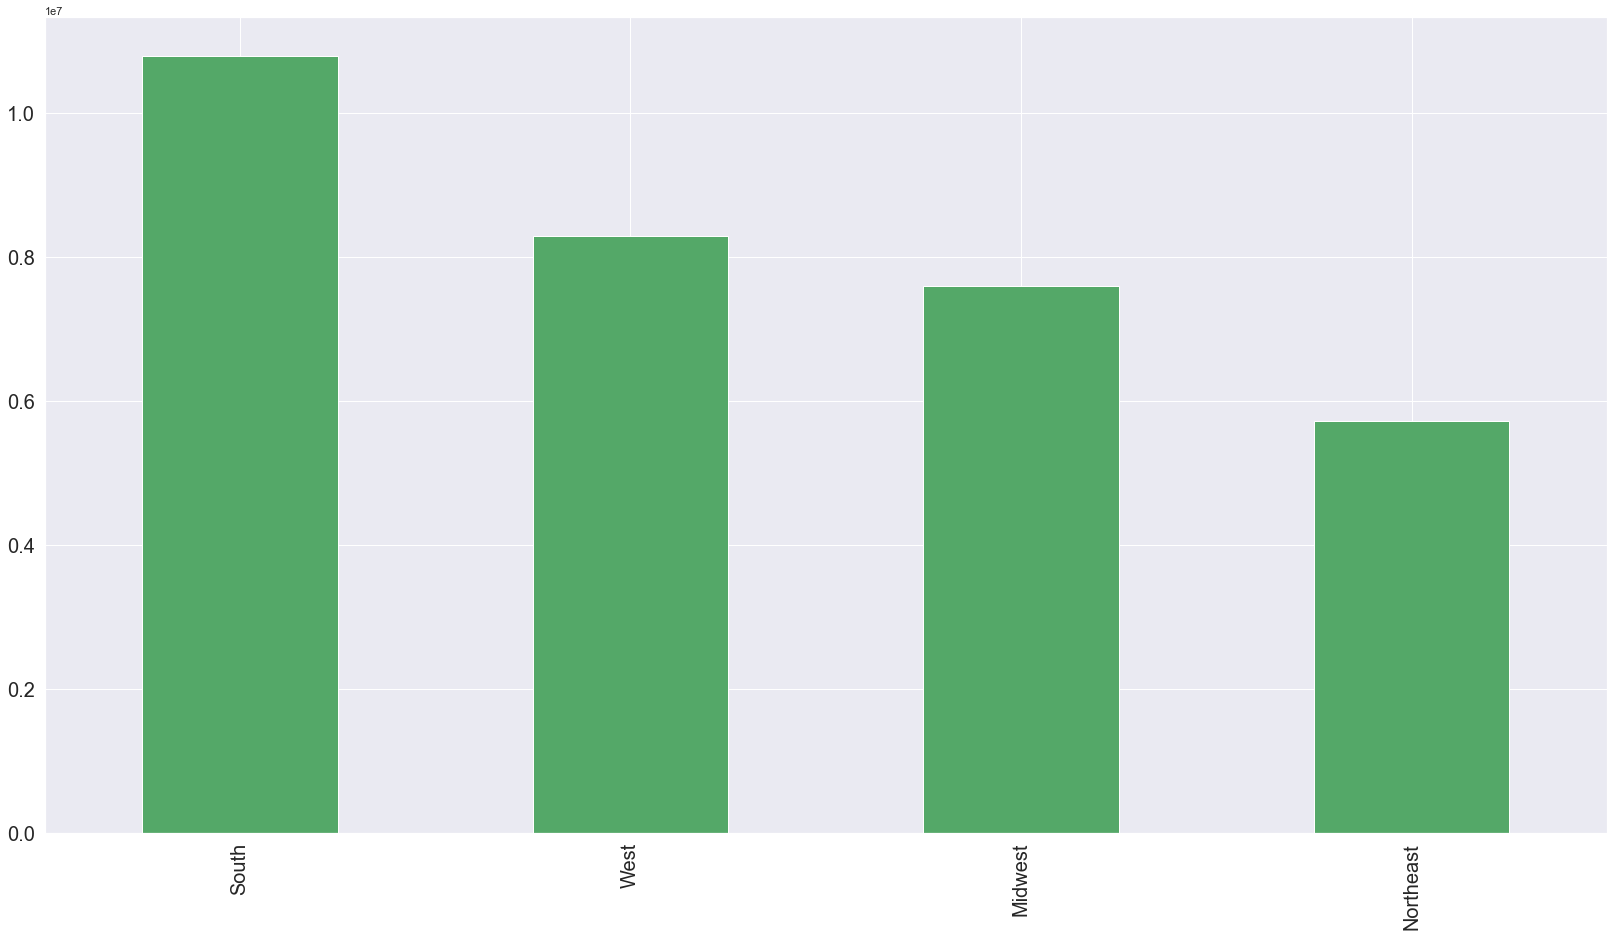

In [47]:
#set script figure size to 28,15
sns.set(rc = {'figure.figsize':(28,15)})
#regional distribution of customers
regional_bar=df['region'].value_counts().plot.bar(color='#54a868', fontsize=20)

##### The south has the most customers, then the west, the midwest and the northeast has the least customers

In [50]:
#100% stacked bar chart for order frequency in each region

#creating crosstab for region and frequency

region_frequency = pd.crosstab(index=df['region'], columns=df['order_frequency'], normalize="index")

#creating cross tab to display labels

region_frequency_labels = pd.crosstab(index=df['region'],columns=df['order_frequency'])

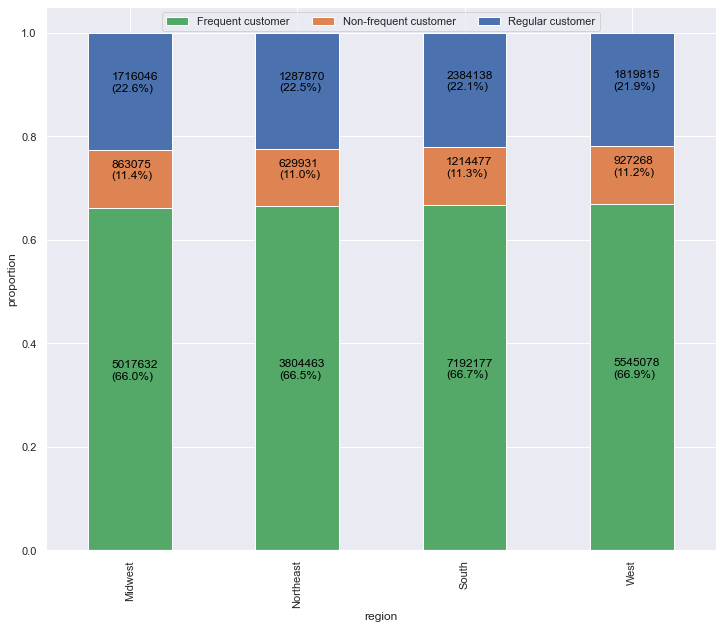

In [51]:
#plotting chart
region_frequency_dist=region_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['#54a868','#de8452','#4b72af'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("region")


for n, y in enumerate([*region_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(region_frequency.loc[y],
                                         region_frequency_labels.loc[y],
                                          region_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

## 6 Observing ordering habits across the different customer loyalties

In [52]:
#aggregating for loyalty expenditure
df.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                      mean  min   max
loyalty_flag                         
Loyal Customer    7.773575  1.0  25.0
New customer      7.801447  1.0  25.0
Regular customer  7.798262  1.0  25.0

##### different customer loyalties have similar means

In [53]:
#aggregating for loyalty order frequency
df.groupby('loyalty_flag').agg({'median_prior_days': ['mean', 'min', 'max']})

median_prior_days           
                              mean  min   max
loyalty_flag                                 
Loyal Customer            5.170559  0.0  14.0
New customer             18.458740  0.0  30.0
Regular customer         10.612951  0.0  30.0

##### loyal customers have have the highest order frequency, they are all frequent customers, the regular customers are a little frequent while the new customers are regular frequency customers

## 7 Visualizations for customer loyalty observations

In [288]:
#distribution of customer loyalty
#creating subset with userid and loyalty columns
user_loyalty=df[['user_id','loyalty_flag']]
#removing duplicate values
user_loyalty_unique=user_loyalty.drop_duplicates()

In [262]:
user_loyalty_unique['loyalty_flag'].value_counts()

New customer        111529
Regular customer     76864
Loyal Customer       17017
Name: loyalty_flag, dtype: int64

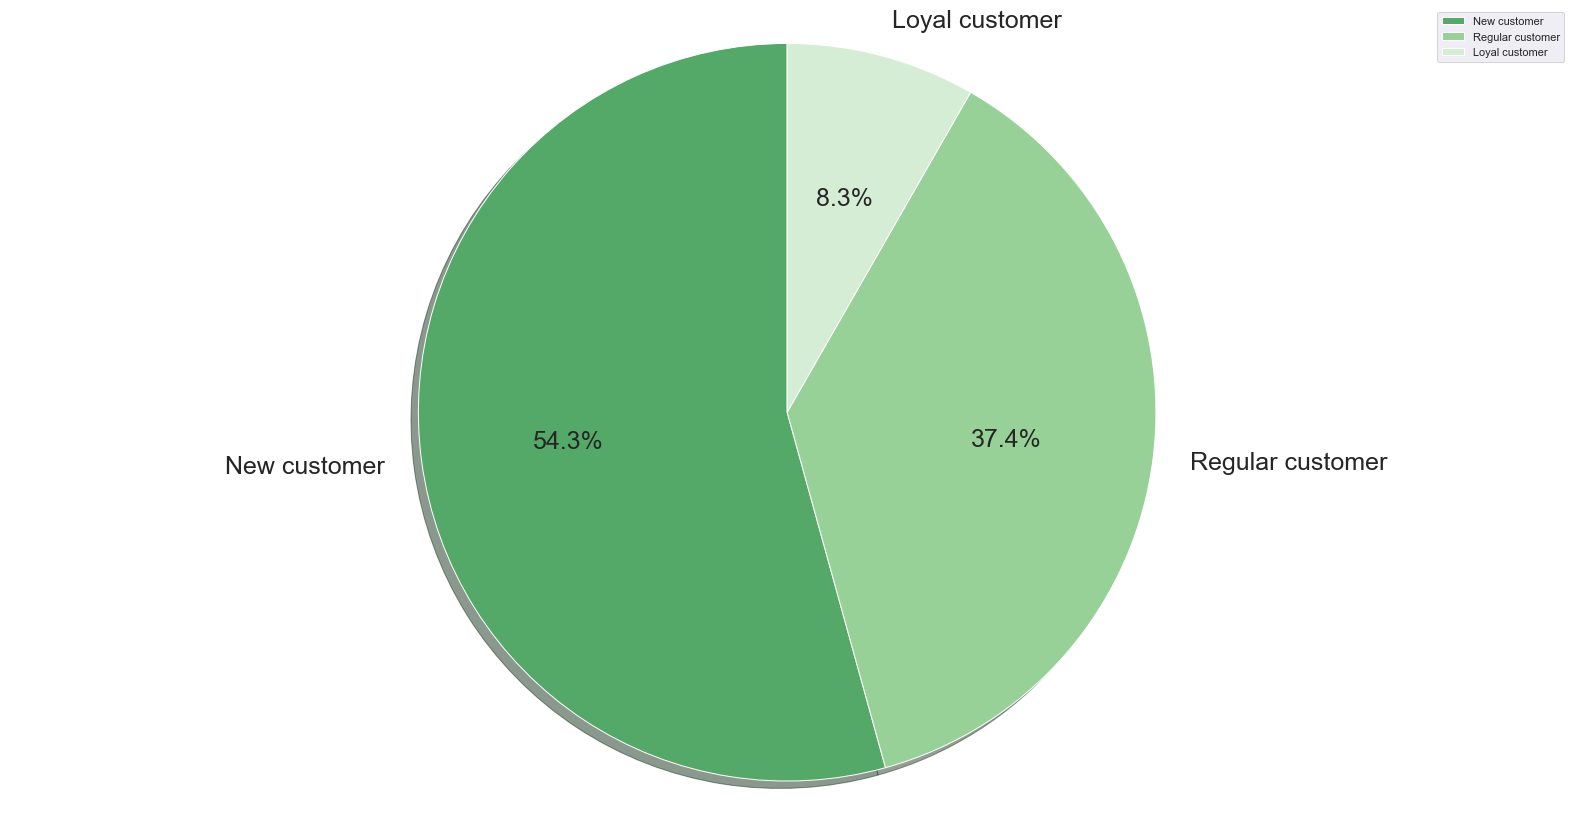

In [269]:
##pie chart for loyalty flag
labels = 'New customer', 'Regular customer', 'Loyal customer'
sizes = user_loyalty_unique['loyalty_flag'].value_counts()
colors = ['#54a868','#97d197','#d5edd5']
textprops = {"fontsize":25}

loyal, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops=textprops)
ax.axis('equal')  

plt.legend()
plt.show()


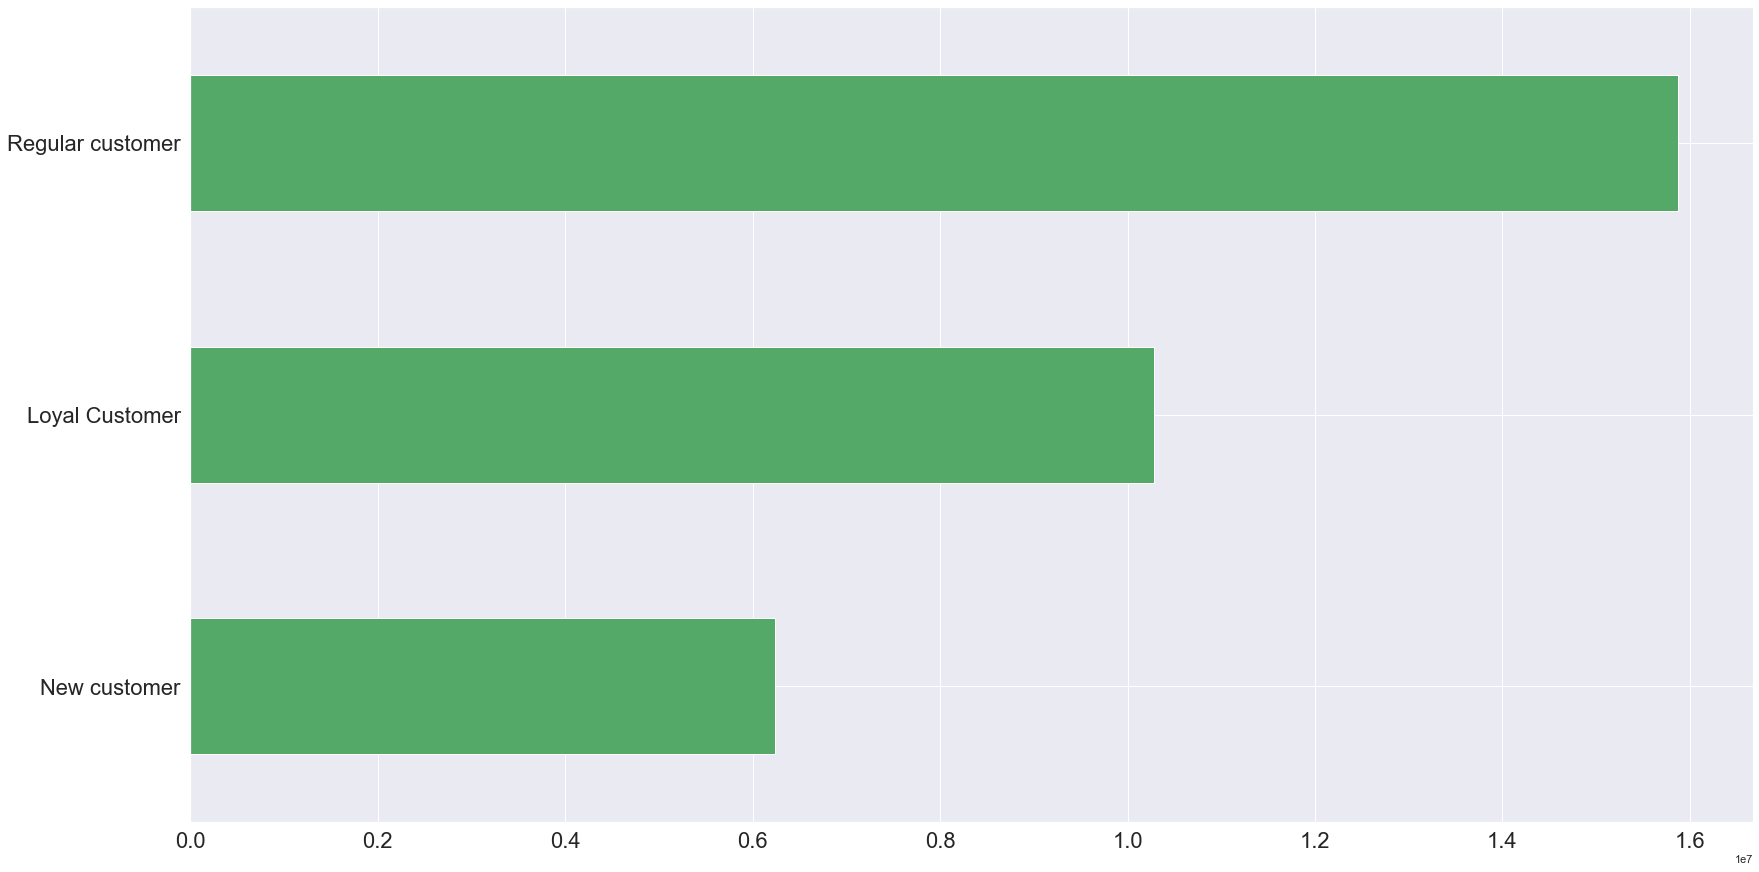

In [54]:
# frequency of orders from different customer loyalities
loyalty_bar=df['loyalty_flag'].value_counts().sort_values().plot.barh(color='#54a868',fontsize=22)

In [55]:
#100% stacked bar chart for proportion of customer spending flag for each loyalty flag

#creating crosstab for loyalty flag and spending flag

loyalty_spend = pd.crosstab(index=df['loyalty_flag'], columns=df['spending_flag'], normalize="index")

#creating cross tab to display labels

loyalty_spend_labels = pd.crosstab(index=df['loyalty_flag'],columns=df['spending_flag'])

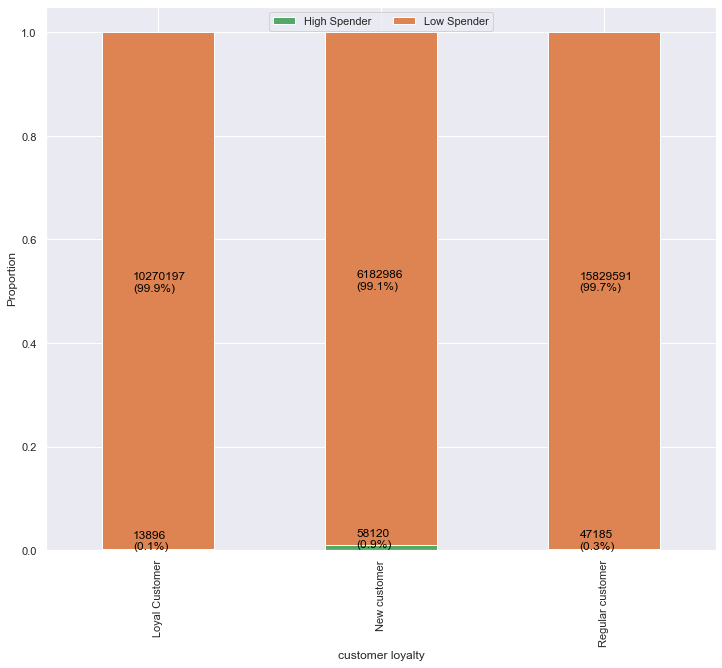

In [56]:
loyalty_spend_dist=loyalty_spend.plot(kind='bar', 
                        stacked=True, 
                        color=['#54a868','#de8452'], 
                        figsize=(12, 10))

plt.legend(loc="upper center", ncol=2)
plt.ylabel("Proportion")
plt.xlabel("customer loyalty")


for n, y in enumerate([*loyalty_spend_labels.index.values]):
    for (proportion, count, x_loc) in zip(loyalty_spend.loc[y],
                                         loyalty_spend_labels.loc[y],
                                          loyalty_spend.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

##### loyal customers have a higher proportion of high spenders than the new customers and the regular customers, the new customers have a higher proportion of high spenders than the regular customers

In [57]:
#100% stacked bar chart for order frequency for each loyalty status

#creating crosstab for loyalty flag and frequency

loyalty_frequency = pd.crosstab(index=df['loyalty_flag'], columns=df['order_frequency'], normalize="index")

#creating cross tab to display labels

loyalty_frequency_labels = pd.crosstab(index=df['loyalty_flag'],columns=df['order_frequency'])

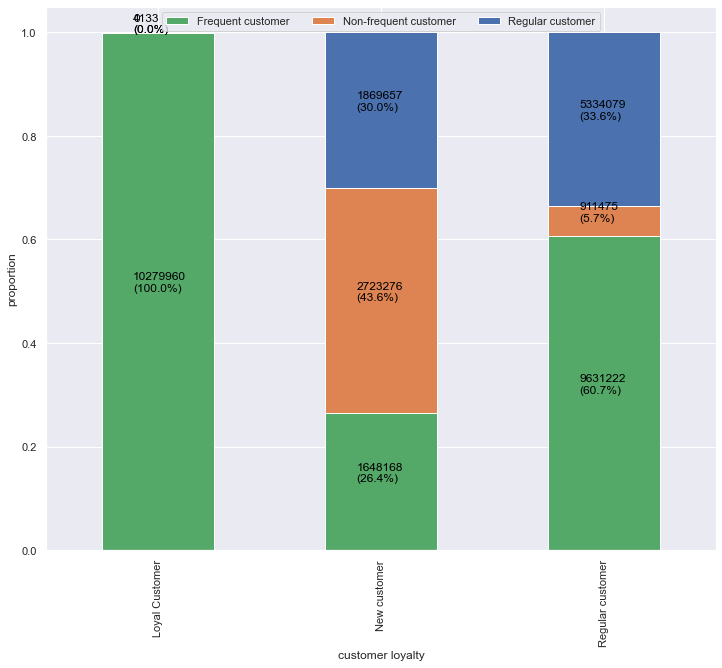

In [58]:
#plotting chart
loyalty_frequency_dist=loyalty_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['#54a868','#de8452','#4b72af'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("customer loyalty")


for n, y in enumerate([*loyalty_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(loyalty_frequency.loc[y],
                                         loyalty_frequency_labels.loc[y],
                                          loyalty_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

## 8 Creating customer profiles

### Age group flag

In [59]:
#creating age group flag
#young adults range from 18-24
df.loc[df['age'] <= 24, 'age_group'] = 'Young adult'
#adults range from 25-64
#adult flag
df.loc[(df['age'] > 24) & (df['age'] <=64), 'age_group'] = 'Adult' 
#seniors range from 65 and over
#senior flag
df.loc[df['age'] >=65, 'age_group'] = 'Senior'

In [250]:
df['age_group'].value_counts()

Adult          20254986
Senior          8574323
Young adult     3572666
Name: age_group, dtype: int64

### Age group aggregation

In [61]:
#aggregating for age group expenditure
df.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Adult        7.788711  1.0  25.0
Senior       7.796590  1.0  25.0
Young adult  7.790922  1.0  25.0

In [62]:
#aggregating for age group order frequency
df.groupby('age_group').agg({'median_prior_days': ['mean', 'min', 'max']})

median_prior_days           
                         mean  min   max
age_group                               
Adult               10.418793  0.0  30.0
Senior              10.361466  0.0  30.0
Young adult         10.356916  0.0  30.0

### Income flag

In [63]:
#creating income flag: Low income, middle income and upper income
#Low income ranges from 0-52,000
#low income flag
df.loc[df['income'] <= 52000, 'income_flag'] = 'Low income'
#Middle income ranges from 52,000-156,000
#middle income flag
df.loc[(df['income'] > 52000) & (df['income'] <=156000), 'income_flag'] = 'Middle income' 
# Upper income ranges from 156,000 and higher
#upper income flag
df.loc[df['income'] > 156000, 'income_flag'] = 'Upper income'
#these values are the official ranges for the US in 2017

In [252]:
df['income_flag'].value_counts()

Middle income    25572168
Low income        3878331
Upper income      2951476
Name: income_flag, dtype: int64

### Income flag aggregates

In [65]:
#aggregating for income bracket expenditure
df.groupby('income_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
income_flag                       
Low income     6.741794  1.0  25.0
Middle income  7.932592  1.0  25.0
Upper income   7.943601  1.0  25.0

In [66]:
#aggregating for income bracket order frequency
df.groupby('income_flag').agg({'median_prior_days': ['mean', 'min', 'max']})

median_prior_days           
                           mean  min   max
income_flag                               
Low income            11.089335  0.0  30.0
Middle income         10.321047  0.0  30.0
Upper income          10.143134  0.0  30.0

### Marital status

In [67]:
df['marital_status'].value_counts()

married                             22754753
single                               5325187
divorced/widowed                     2771562
living with parents and siblings     1550473
Name: marital_status, dtype: int64

#### Marital status aggregates

In [68]:
#aggregating for marital status expenditure
df.groupby('marital_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                                      mean  min   max
marital_status                                       
divorced/widowed                  7.801018  1.0  25.0
living with parents and siblings  7.800799  1.0  25.0
married                           7.790743  1.0  25.0
single                            7.784273  1.0  25.0

In [69]:
#aggregating for marital status order frequency
df.groupby('marital_status').agg({'median_prior_days': ['mean', 'min', 'max']})

median_prior_days           
                                              mean  min   max
marital_status                                               
divorced/widowed                         10.314168  0.0  30.0
living with parents and siblings         10.322765  0.0  30.0
married                                  10.412608  0.0  30.0
single                                   10.393819  0.0  30.0

In [80]:
df.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'no_of_dependents',
       'marital_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_periods', 'max_order',
       'loyalty_flag', 'mean_price', 'spending_flag', 'median_prior_days',
       'order_frequency', 'total_orders', 'activity_flag', 'region',
       'age_group', 'income_flag', 'department'],
      dtype='object')

### Dependent  flag

In [160]:
#customers with 0 dependents are no dependents customers
df.loc[df['no_of_dependents']== 0, 'dependent_flag'] = 'No dependents'
#customers with more than 0 dependents are parents
df.loc[df['no_of_dependents'] > 0, 'dependent_flag'] = 'Parent'


In [254]:
df['dependent_flag'].value_counts()

Parent           24305226
No dependents     8096749
Name: dependent_flag, dtype: int64

#### Dependent flag aggregates

In [162]:
#aggregating for dependent expenditure
df.groupby('dependent_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
dependent_flag                     
No dependents   7.790005  1.0  25.0
Parent          7.791384  1.0  25.0

In [163]:
#aggregating for dependent order frequency
df.groupby('dependent_flag').agg({'median_prior_days': ['mean', 'min', 'max']})

median_prior_days           
                            mean  min   max
dependent_flag                             
No dependents          10.366554  0.0  30.0
Parent                 10.406877  0.0  30.0

### Department flags

##### profiles will be made based on the pet department

In [74]:
#importing departments dataset
departments=pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'departments_wrangled.csv'),index_col=False)

In [75]:
#creating data dictionary for department id
zipped=zip(departments['Unnamed: 0'], departments['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [76]:
# mapping  department names to department id in dataframe
df['department'] = df['department_id'].map(data_dict)
df.head()

,user_id,gender,state,age,date_joined,no_of_dependents,marital_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,busiest_days,busiest_periods,max_order,loyalty_flag,mean_price,spending_flag,median_prior_days,order_frequency,total_orders,activity_flag,region,age_group,income_flag,dependent_no_dependent,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2543867,5,1,9,30.0,2,0,both,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,18,Regular Activity,Midwest,Adult,Upper income,dependent,beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,1285508,7,5,15,11.0,1,1,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,18,Regular Activity,Midwest,Adult,Upper income,dependent,beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2578584,8,1,15,10.0,2,1,both,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,18,Regular Activity,Midwest,Adult,Upper income,dependent,beverages
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,518967,1,2,9,NaN,1,0,both,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,18,Regular Activity,Midwest,Adult,Upper income,dependent,produce
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2524893,3,3,11,30.0,2,1,both,Low-range product,Regularly busy,Least busy days,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,18,Regular Activity,Midwest,Adult,Upper income,dependent,produce


#### pet parent flag

In [77]:
#creating subset for customers who have purchased pet products
pet_parents=df.loc[df['department']=='pets']

In [78]:
pet_parents

,user_id,gender,state,age,date_joined,no_of_dependents,marital_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,busiest_days,busiest_periods,max_order,loyalty_flag,mean_price,spending_flag,median_prior_days,order_frequency,total_orders,activity_flag,region,age_group,income_flag,dependent_no_dependent,department
171,65803,Male,Idaho,35,1/1/2017,2,married,99568,37068,24/7 Performance Clumping Litter,41,8,8.1,3233494,6,2,13,4.0,1,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,9,New customer,8.375962,Low Spender,7.0,Frequent customer,104,Regular Activity,West,Adult,Middle income,dependent,pets
4137,100123,Male,Florida,31,1/1/2017,2,married,95906,23329,Organix Chicken & Brown Rice Recipe,40,8,8.6,1163957,18,4,16,16.0,1,0,both,Mid-range product,Least busy,Least busy days,Most orders,18,Regular customer,7.917826,Low Spender,8.0,Frequent customer,460,Regular Activity,South,Adult,Middle income,dependent,pets
4624,104359,Male,Idaho,66,1/1/2017,1,married,104025,38766,Turkey & Sweet Potato Dog Treats,40,8,14.0,2722872,16,4,9,15.0,16,0,both,Mid-range product,Least busy,Least busy days,Most orders,18,Regular customer,7.965696,Low Spender,15.0,Regular customer,309,Regular Activity,West,Senior,Middle income,dependent,pets
9221,76659,Male,Colorado,26,1/1/2017,2,married,41709,33592,Spots Stew Wild Salmon Canned Cat Food,41,8,7.4,3089252,21,5,14,10.0,10,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,8.217224,Low Spender,8.0,Frequent customer,389,Regular Activity,West,Adult,Low income,dependent,pets
9222,76659,Male,Colorado,26,1/1/2017,2,married,41709,33592,Spots Stew Wild Salmon Canned Cat Food,41,8,7.4,965175,22,5,10,7.0,6,1,both,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,8.217224,Low Spender,8.0,Frequent customer,389,Regular Activity,West,Adult,Low income,dependent,pets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404392,83573,Female,Michigan,28,4/1/2020,0,single,32237,20166,"Dog Snacks, Medium",40,8,14.7,703554,6,0,11,9.0,7,1,both,Mid-range product,Busiest day,Busiest days,Most orders,23,Regular customer,6.595266,Low Spender,14.0,Regular customer,338,Regular Activity,Midwest,Adult,Low income,no dependent,pets
32404393,83573,Female,Michigan,28,4/1/2020,0,single,32237,20166,"Dog Snacks, Medium",40,8,14.7,2967559,9,5,15,14.0,9,1,both,Mid-range product,Regularly busy,Regularly busy,Most orders,23,Regular customer,6.595266,Low Spender,14.0,Regular customer,338,Regular Activity,Midwest,Adult,Low income,no dependent,pets
32404394,83573,Female,Michigan,28,4/1/2020,0,single,32237,20166,"Dog Snacks, Medium",40,8,14.7,941444,21,1,16,14.0,16,1,both,Mid-range product,Regularly busy,Busiest days,Most orders,23,Regular customer,6.595266,Low Spender,14.0,Regular customer,338,Regular Activity,Midwest,Adult,Low income,no dependent,pets
32404395,83573,Female,Michigan,28,4/1/2020,0,single,32237,20166,"Dog Snacks, Medium",40,8,14.7,2431606,22,6,16,19.0,11,1,both,Mid-range product,Regularly busy,Regularly busy,Most orders,23,Regular customer,6.595266,Low Spender,14.0,Regular customer,338,Regular Activity,Midwest,Adult,Low income,no dependent,pets


In [90]:
#turning unique user ids to list
pet_parents_list=(pet_parents['user_id'].unique()).tolist()

In [91]:
pet_parents_list

[65803,
 100123,
 104359,
 76659,
 172673,
 19666,
 13738,
 26787,
 29024,
 118448,
 148726,
 25534,
 51925,
 50211,
 6107,
 14335,
 48809,
 72517,
 162527,
 2823,
 201599,
 198439,
 56480,
 42565,
 100536,
 199686,
 175233,
 56427,
 87345,
 134947,
 204245,
 141398,
 111148,
 10802,
 181774,
 91132,
 4515,
 19277,
 123831,
 9804,
 18825,
 44185,
 127335,
 11282,
 30968,
 138086,
 115909,
 129734,
 21037,
 31176,
 170847,
 76899,
 168044,
 154590,
 166845,
 123347,
 126197,
 90623,
 113762,
 202822,
 197056,
 134406,
 63363,
 123638,
 53819,
 80130,
 101141,
 16219,
 193265,
 82808,
 101024,
 133609,
 118939,
 163775,
 50813,
 66765,
 118185,
 202394,
 94179,
 103276,
 186604,
 84155,
 118962,
 121367,
 85388,
 9709,
 196227,
 84215,
 107060,
 95565,
 126871,
 176365,
 162521,
 98427,
 34977,
 42452,
 68581,
 151842,
 75245,
 141230,
 28066,
 192565,
 34049,
 65707,
 5891,
 8925,
 16652,
 131992,
 64438,
 65771,
 69835,
 108139,
 148172,
 169114,
 31891,
 82802,
 153016,
 169284,
 2038

In [92]:
#households who purchase pet products are pet parents
#user ids on the pet parent list are pet parents
results_4=[]
for user in df['user_id']:
    if user in pet_parents_list:
        results_4.append('pet parent')
    else:
        results_4.append('no pets')


In [93]:
#including column in dataframe
df['pet_parents']=results_4


In [255]:
df['pet_parents'].value_counts().to_clipboard()

#### pet flag aggregates

In [96]:
#aggregating for pet parent expenditure
df.groupby('pet_parents').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
pet_parents                     
no pets      7.788410  1.0  25.0
pet parent   7.812564  1.0  25.0

In [97]:
#aggregating for pet parent order frequency
df.groupby('pet_parents').agg({'median_prior_days': ['mean', 'min', 'max']})

median_prior_days           
                         mean  min   max
pet_parents                             
no pets             10.516897  0.0  30.0
pet parent           9.413948  0.0  30.0

## 9  Visualizations for customer profiles

### Age group

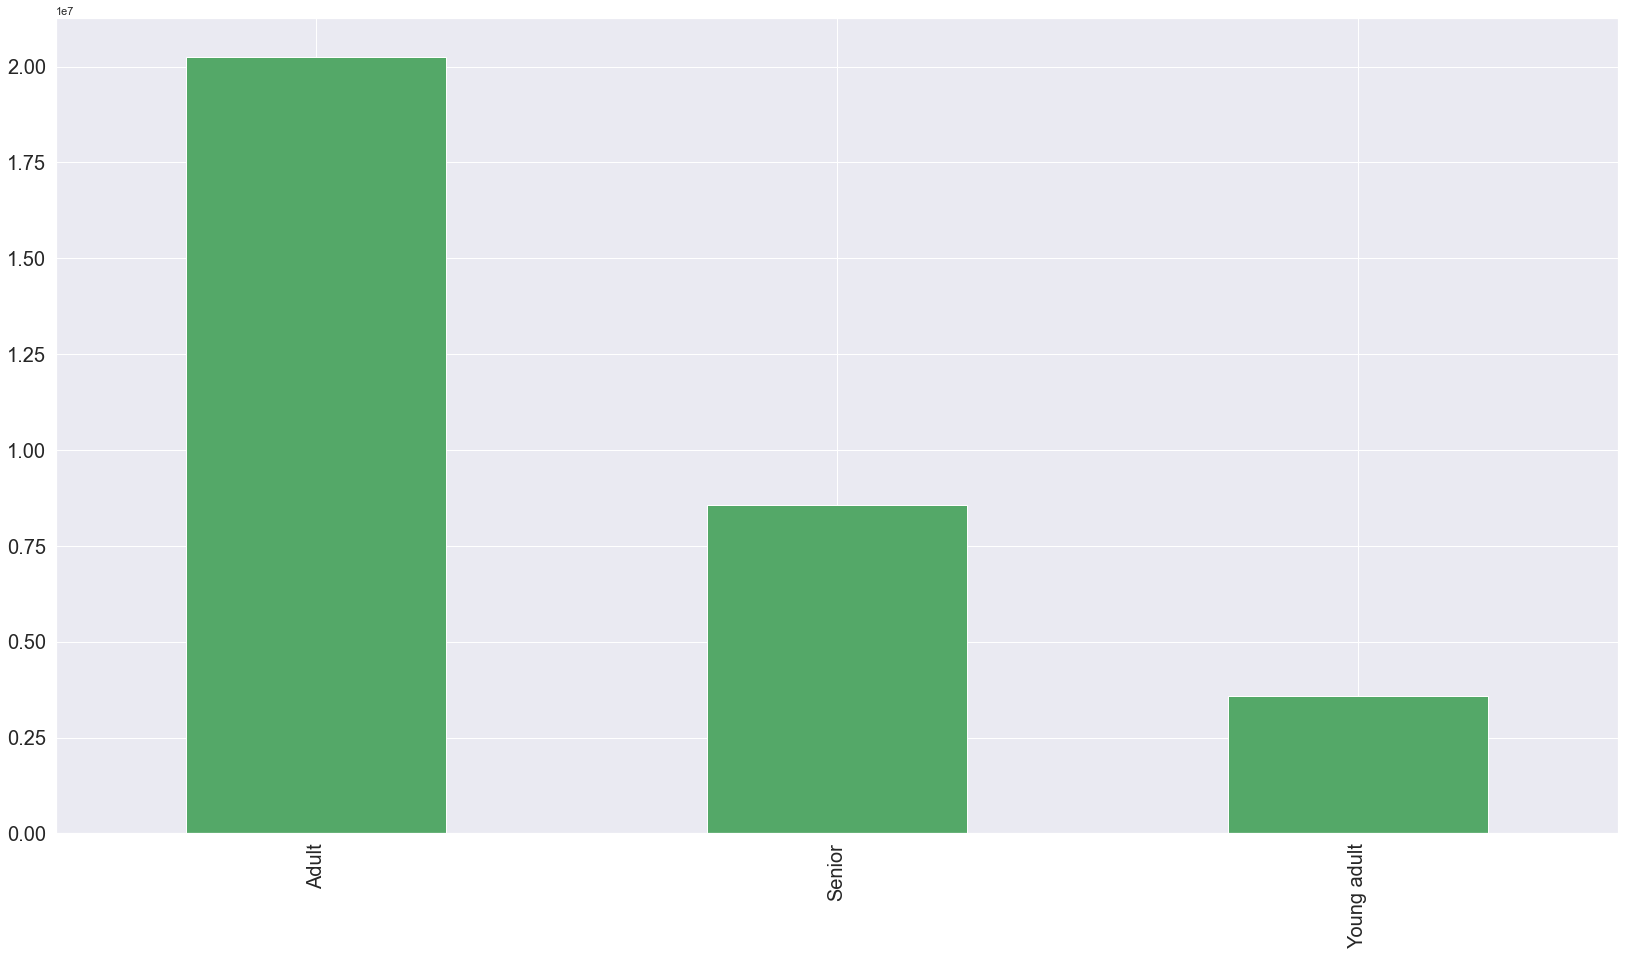

In [99]:
#creating bar chart for orders made by each age group
age_bar=df['age_group'].value_counts().plot.bar(color='#54a868',fontsize=20)

In [100]:
# 100% stacked bar chart for regional age distribution 
#creating crosstab for region and age group

age_region = pd.crosstab(index=df['region'], columns=df['age_group'], normalize="index")

#creating cross tab to display labels

age_region_labels = pd.crosstab(index=df['region'],columns=df['age_group'])

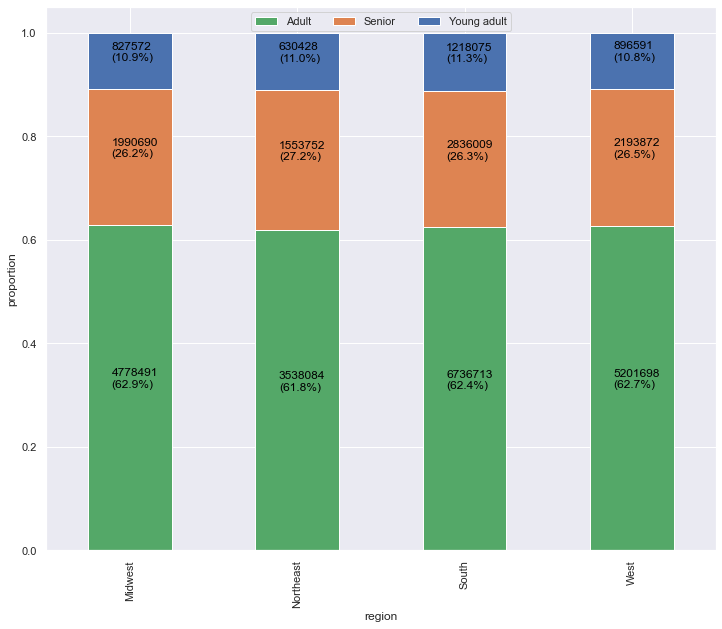

In [101]:
#plotting chart
age_regional_dist=age_region.plot(kind='bar', 
                        stacked=True, 
                        color=['#54a868','#de8452','#4b72af'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("region")


for n, y in enumerate([*age_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_region.loc[y],
                                         age_region_labels.loc[y],
                                          age_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [103]:
# 100% stacked bar chart for age and order frequency distribution 
#creating crosstab for region and age group

age_frequency = pd.crosstab(index=df['age_group'], columns=df['order_frequency'], normalize="index")

#creating cross tab to display labels

age_frequency_labels = pd.crosstab(index=df['age_group'],columns=df['order_frequency'])

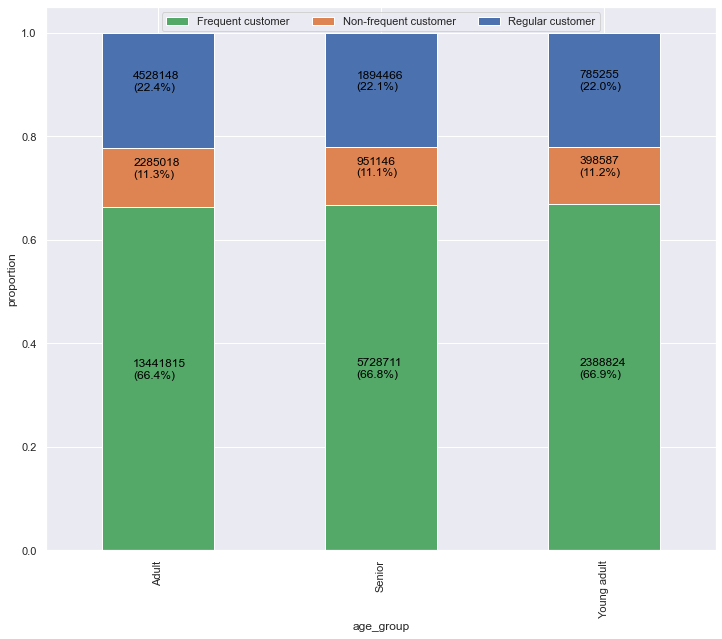

In [104]:
#plotting chart
age_frequency_dist=age_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['#54a868','#de8452','#4b72af'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=3)
plt.ylabel("proportion")
plt.xlabel("age_group")


for n, y in enumerate([*age_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_frequency.loc[y],
                                         age_frequency_labels.loc[y],
                                          age_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

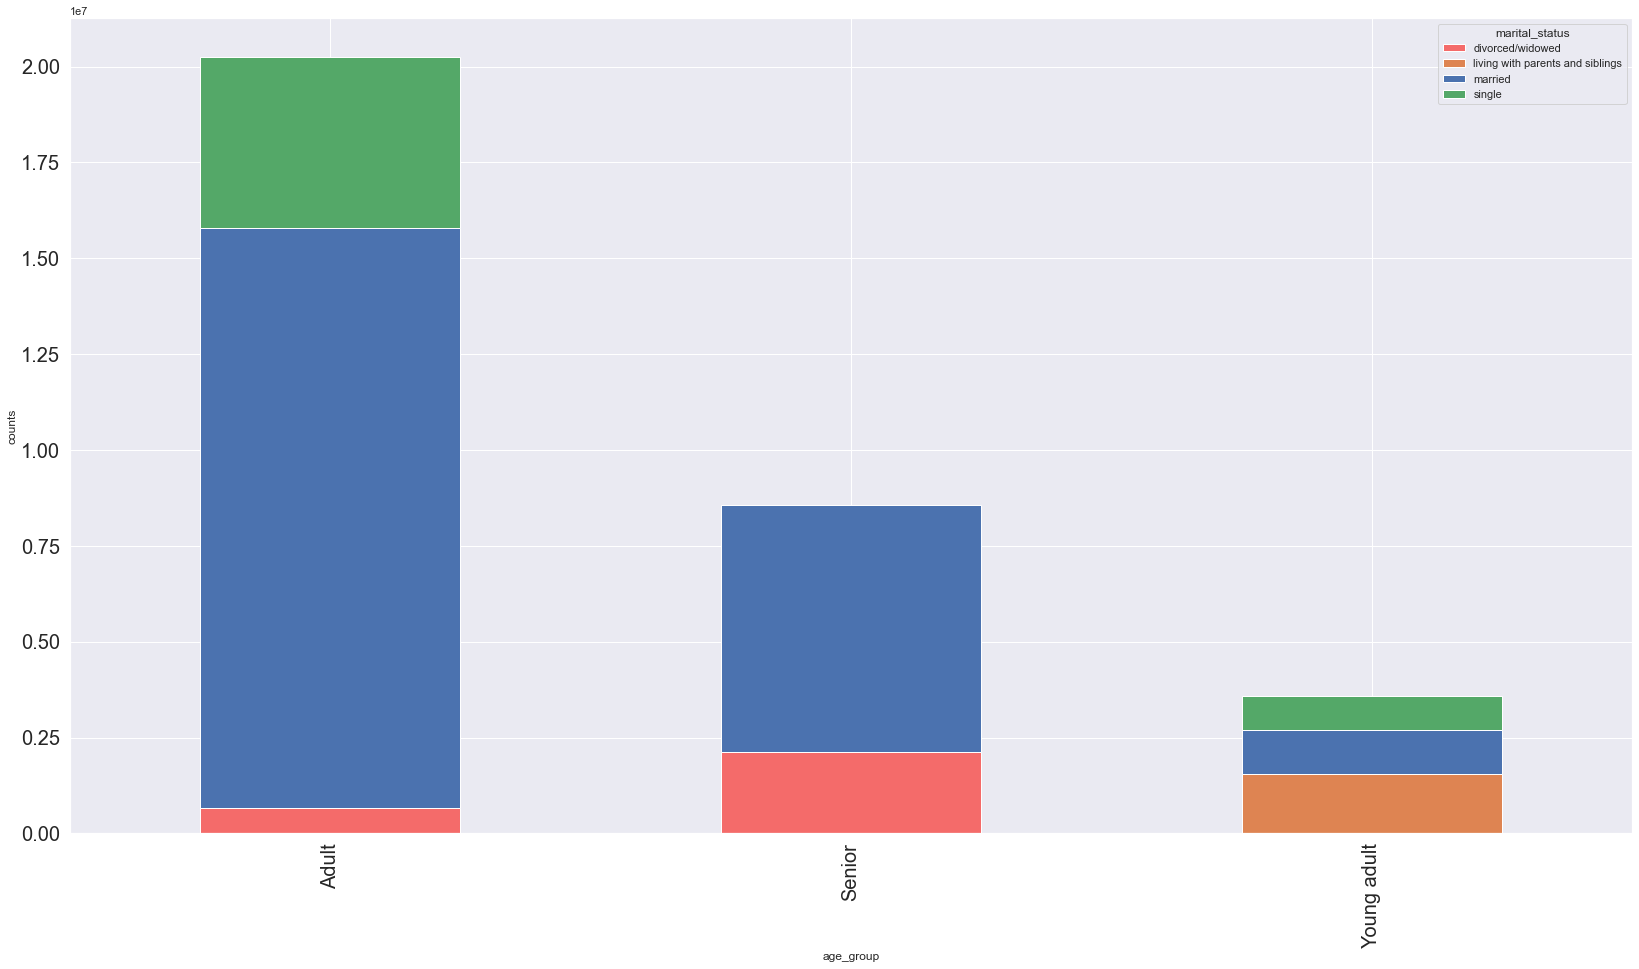

In [114]:
#stacked bar chart for ahe group and marital status
age_marital_bar=df.groupby('age_group')['marital_status'].value_counts().sort_values(ascending=False).unstack().plot.bar(
    stacked=True,ylabel='counts',color=['#F46B6A','#de8452','#4b72af','#54a868'], fontsize=20)

### Income distribution

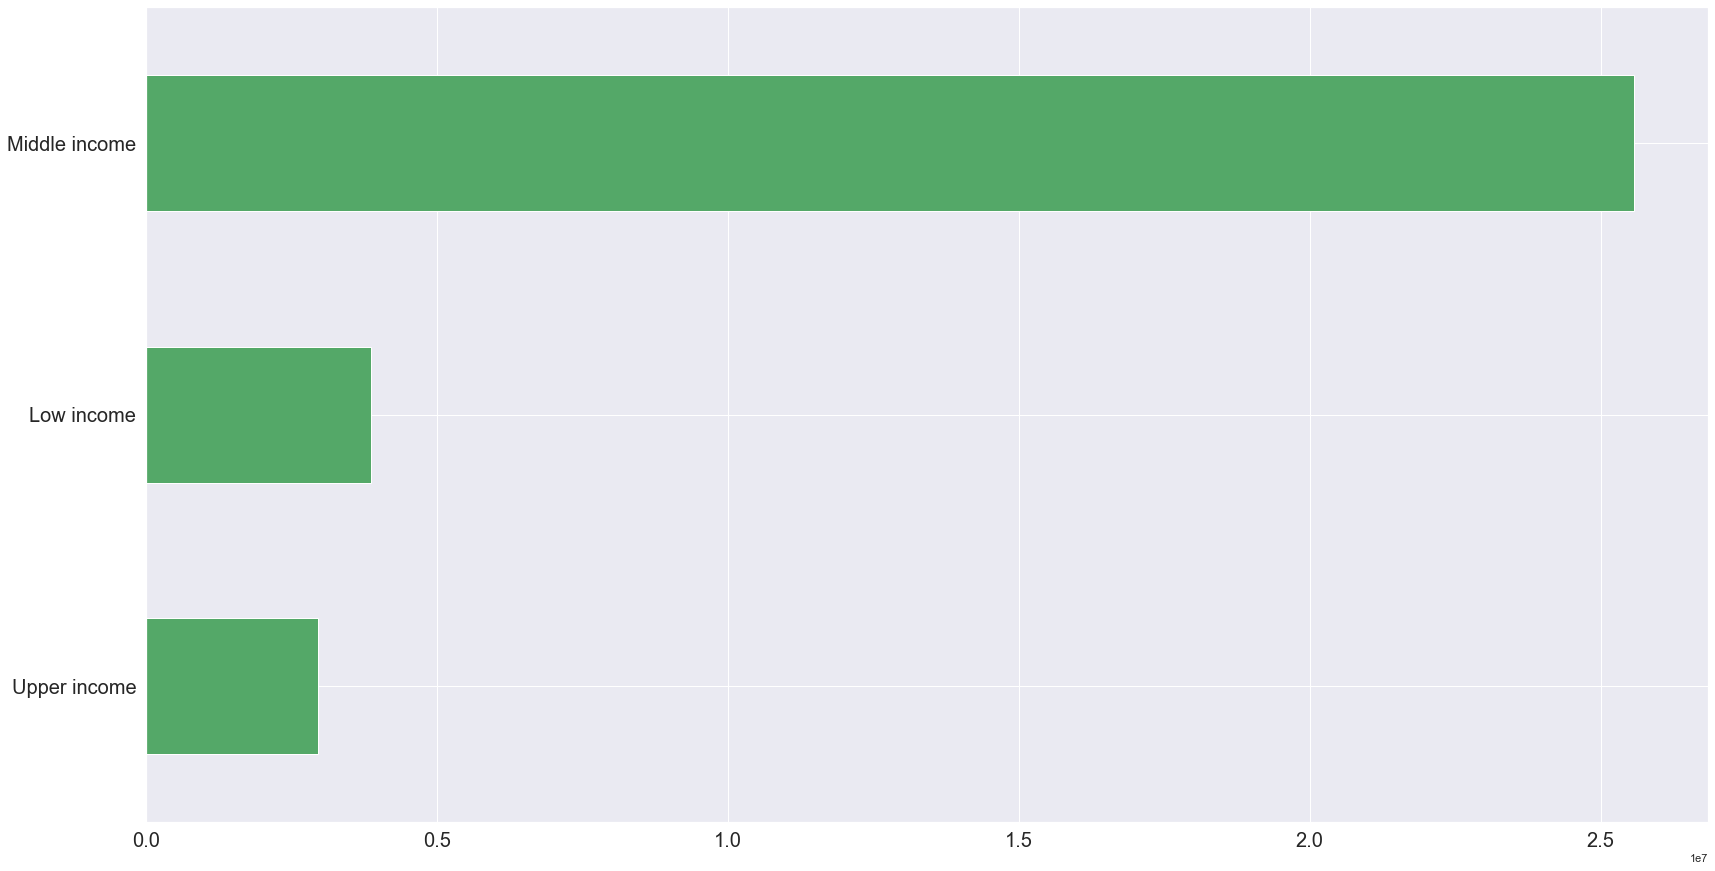

In [115]:
#bar chart for orders made by each income group
income_bar=df['income_flag'].value_counts().sort_values().plot.barh(color='#54a868', fontsize=20)

In [116]:
# 100% stacked bar chart for regional income distribution 
#creating crosstab for region and income flag

income_region = pd.crosstab(index=df['region'], columns=df['income_flag'], normalize="index")

#creating cross tab to display labels

income_region_labels = pd.crosstab(index=df['region'],columns=df['income_flag'])

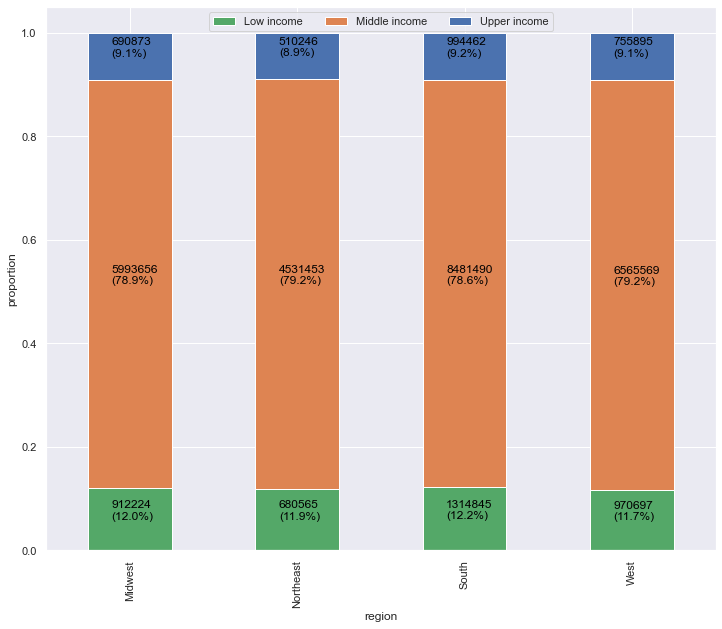

In [117]:
#plotting chart
income_regional_dist=income_region.plot(kind='bar', 
                        stacked=True, 
                        color=['#54a868','#de8452','#4b72af'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("region")


for n, y in enumerate([*income_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(income_region.loc[y],
                                         income_region_labels.loc[y],
                                          income_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [118]:
# 100% stacked bar chart for income order frequency distribution 
#creating crosstab for order frequency and income

income_frequency = pd.crosstab(index=df['income_flag'], columns=df['order_frequency'], normalize="index")

#creating cross tab to display labels

income_frequency_labels = pd.crosstab(index=df['income_flag'],columns=df['order_frequency'])

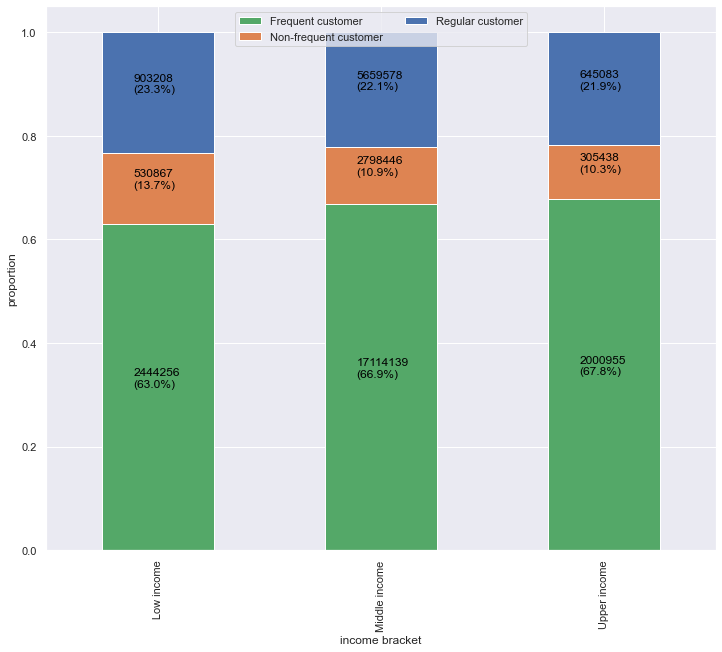

In [119]:
#plotting chart
income_frequency_dist=income_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['#54a868','#de8452','#4b72af'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=2)
plt.ylabel("proportion")
plt.xlabel("income bracket")


for n, y in enumerate([*income_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(income_frequency.loc[y],
                                         income_frequency_labels.loc[y],
                                          income_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

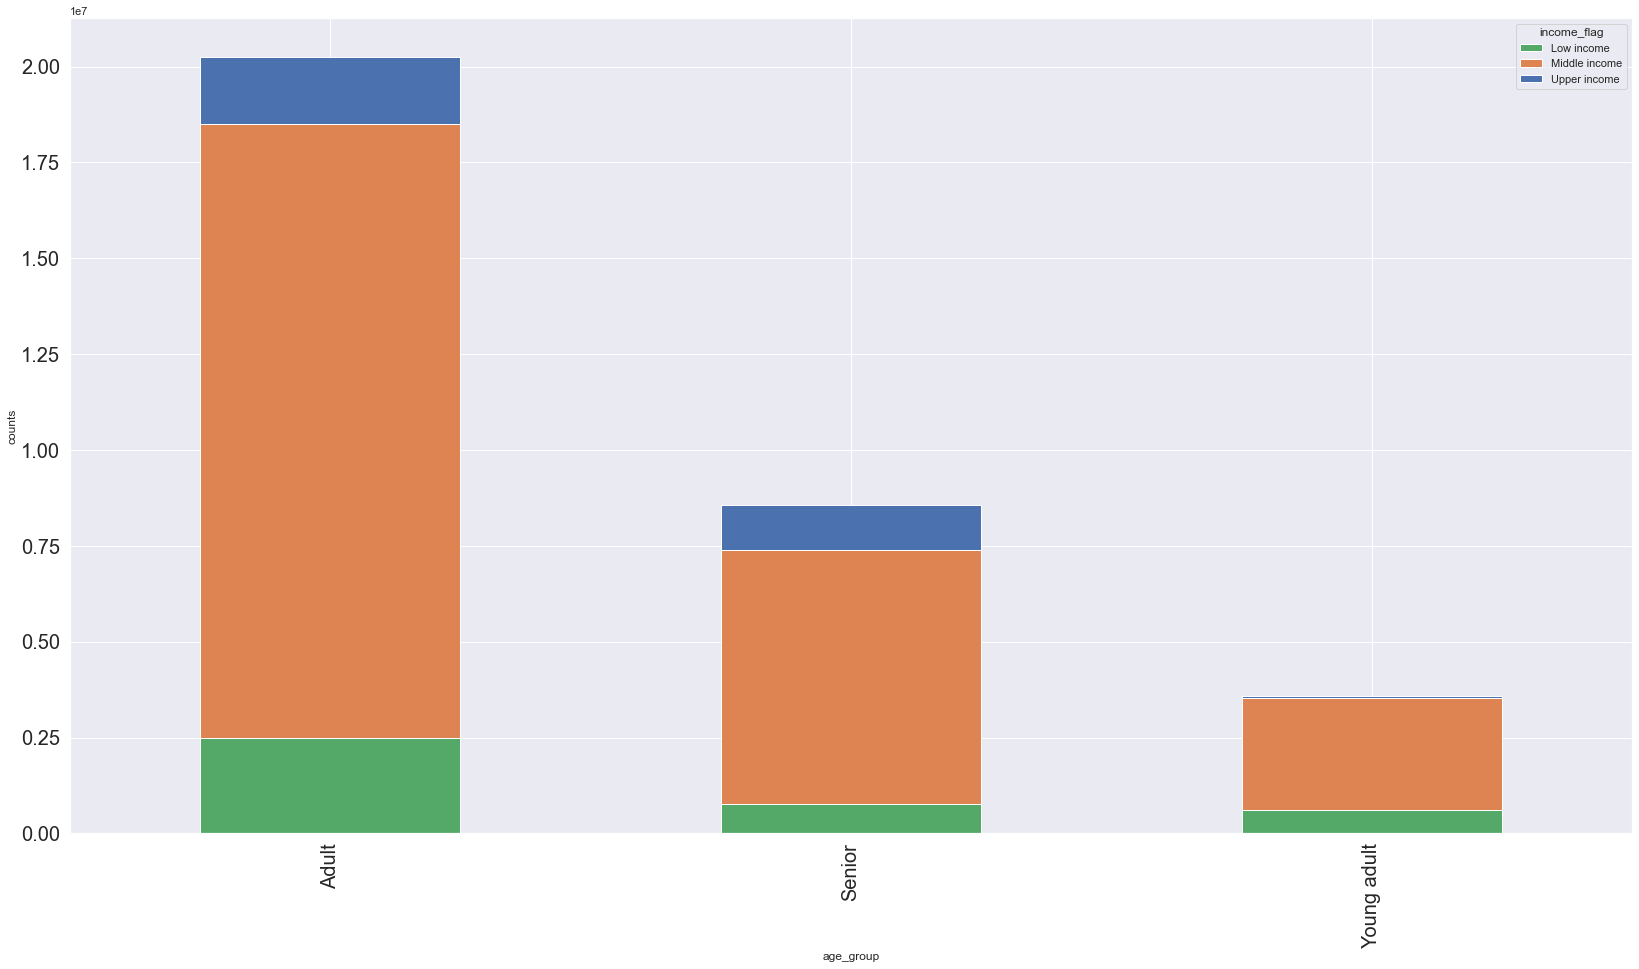

In [181]:
#stacked bar chart for age groups and income groups
age_income_bar=df.groupby('age_group')['income_flag'].value_counts().unstack().plot.bar(stacked=True,
                                                    ylabel='counts',color=['#54a868','#de8452','#4b72af'], fontsize=20)

### crosstab for  income and product price range

In [282]:
#creating crosstab
income_cross=pd.crosstab(df['income_flag'],df['price_range_loc'],normalize='index', dropna=False)

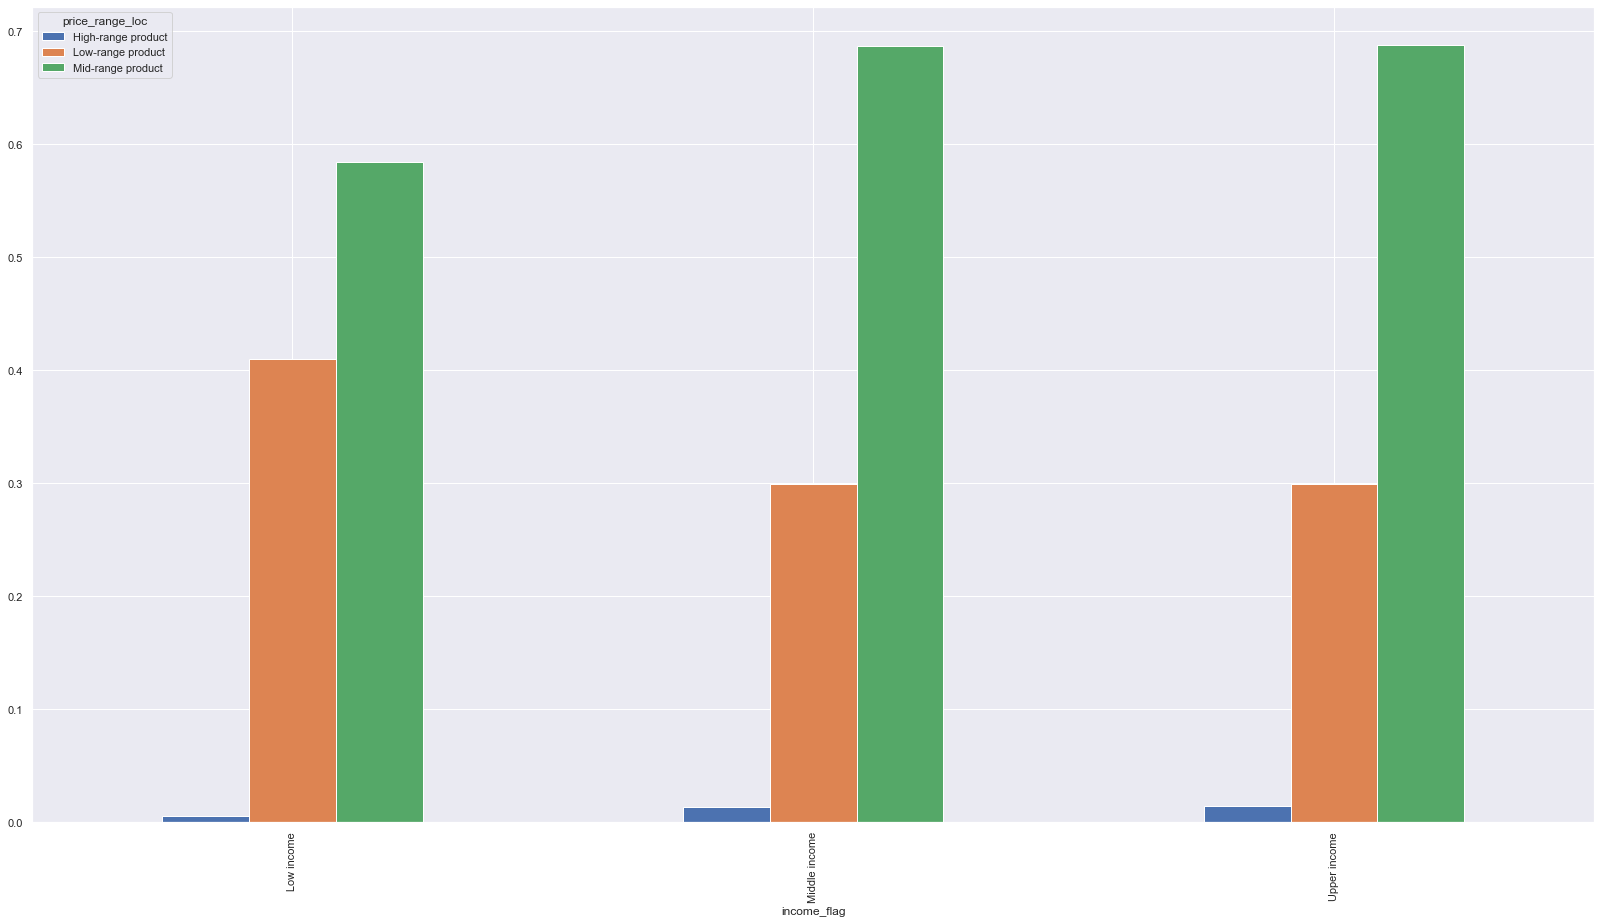

In [286]:
#plotting cross tab
income_cross_bar=income_cross.plot(kind='bar')

### Marital status distribution

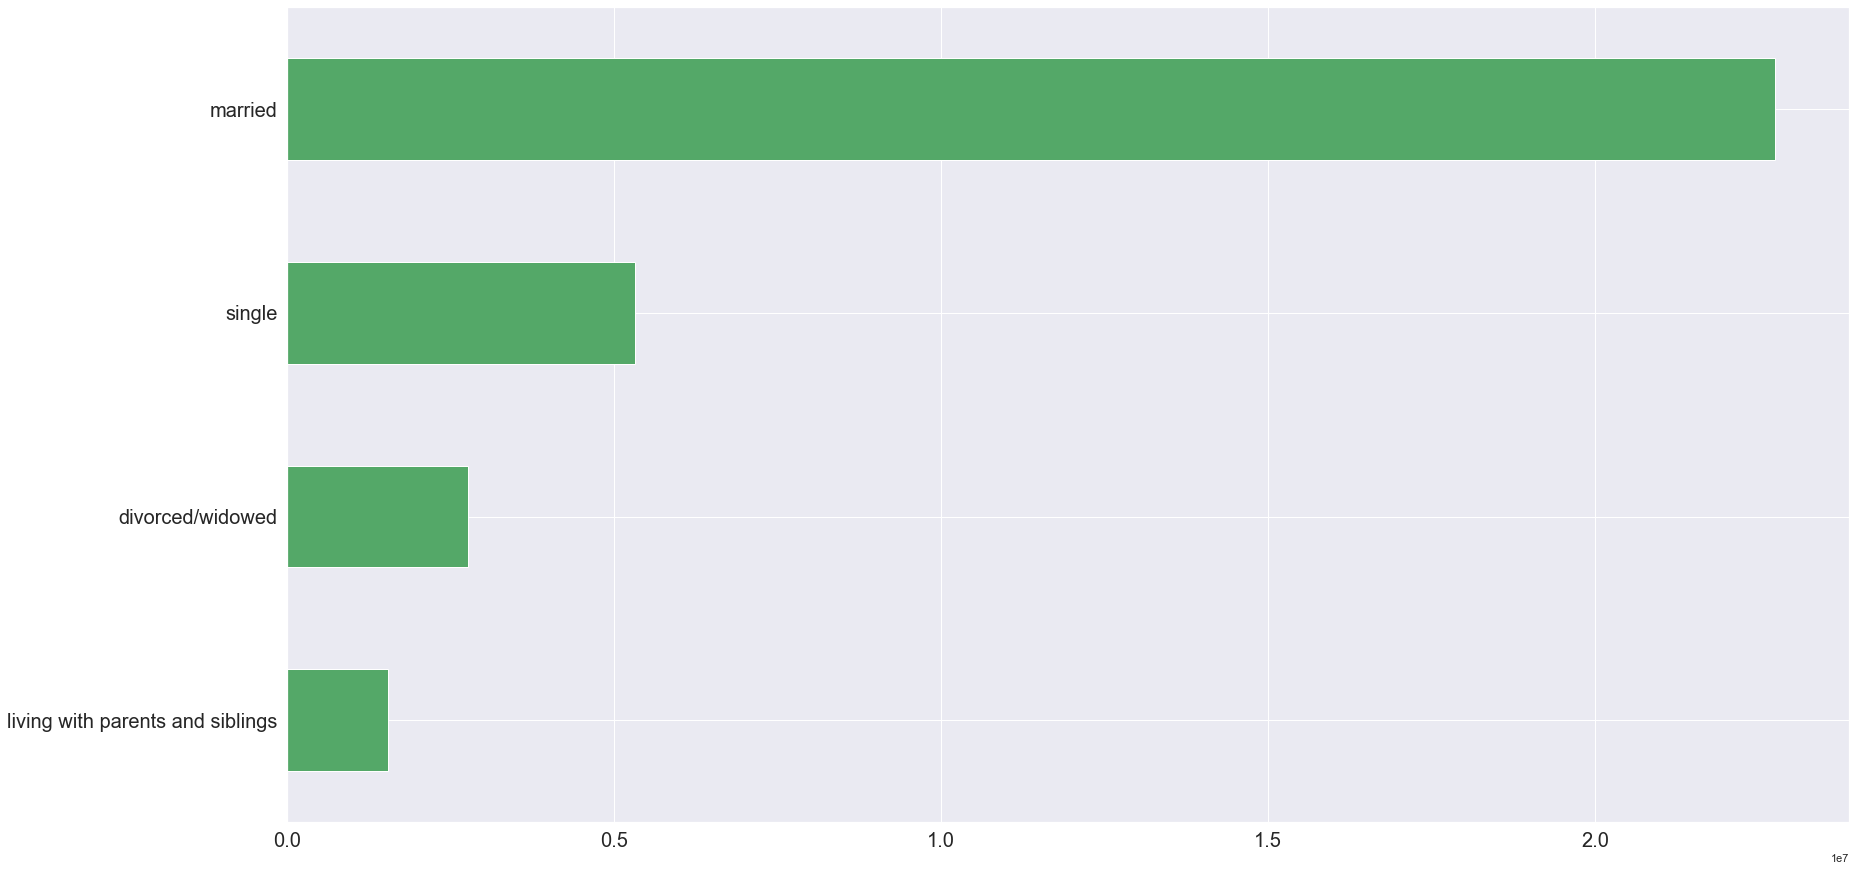

In [127]:
#bar chart showing the orders made by customers of each family status
marital_bar=df['marital_status'].value_counts().sort_values().plot.barh(color='#54a868', fontsize=20)

In [128]:
# 100% stacked bar chart for regional marital distribution 
#creating crosstab for region and marital status

marital_region = pd.crosstab(index=df['region'], columns=df['marital_status'], normalize="index")

#creating cross tab to display labels

marital_region_labels = pd.crosstab(index=df['region'],columns=df['marital_status'])

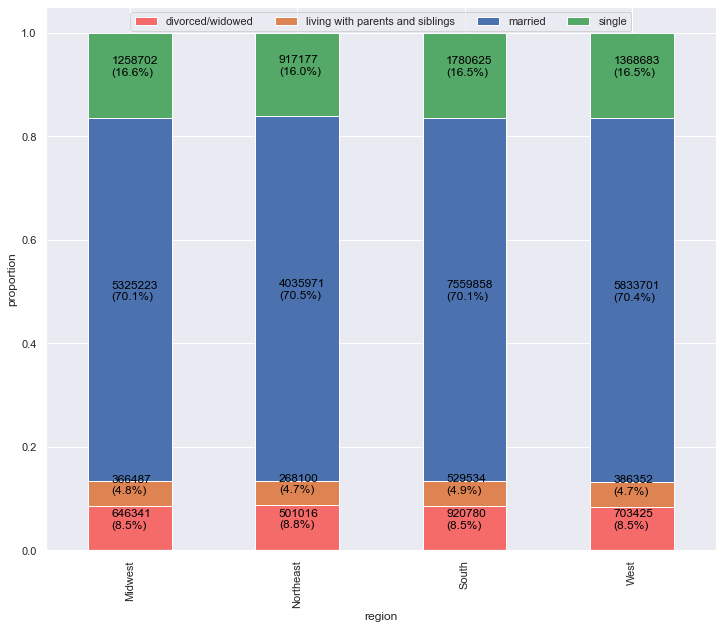

In [129]:
#plotting chart
marital_regional_dist=marital_region.plot(kind='bar', 
                        stacked=True, 
                        color=['#F46B6A','#de8452','#4b72af','#54a868'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("region")


for n, y in enumerate([*marital_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(marital_region.loc[y],
                                         marital_region_labels.loc[y],
                                          marital_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

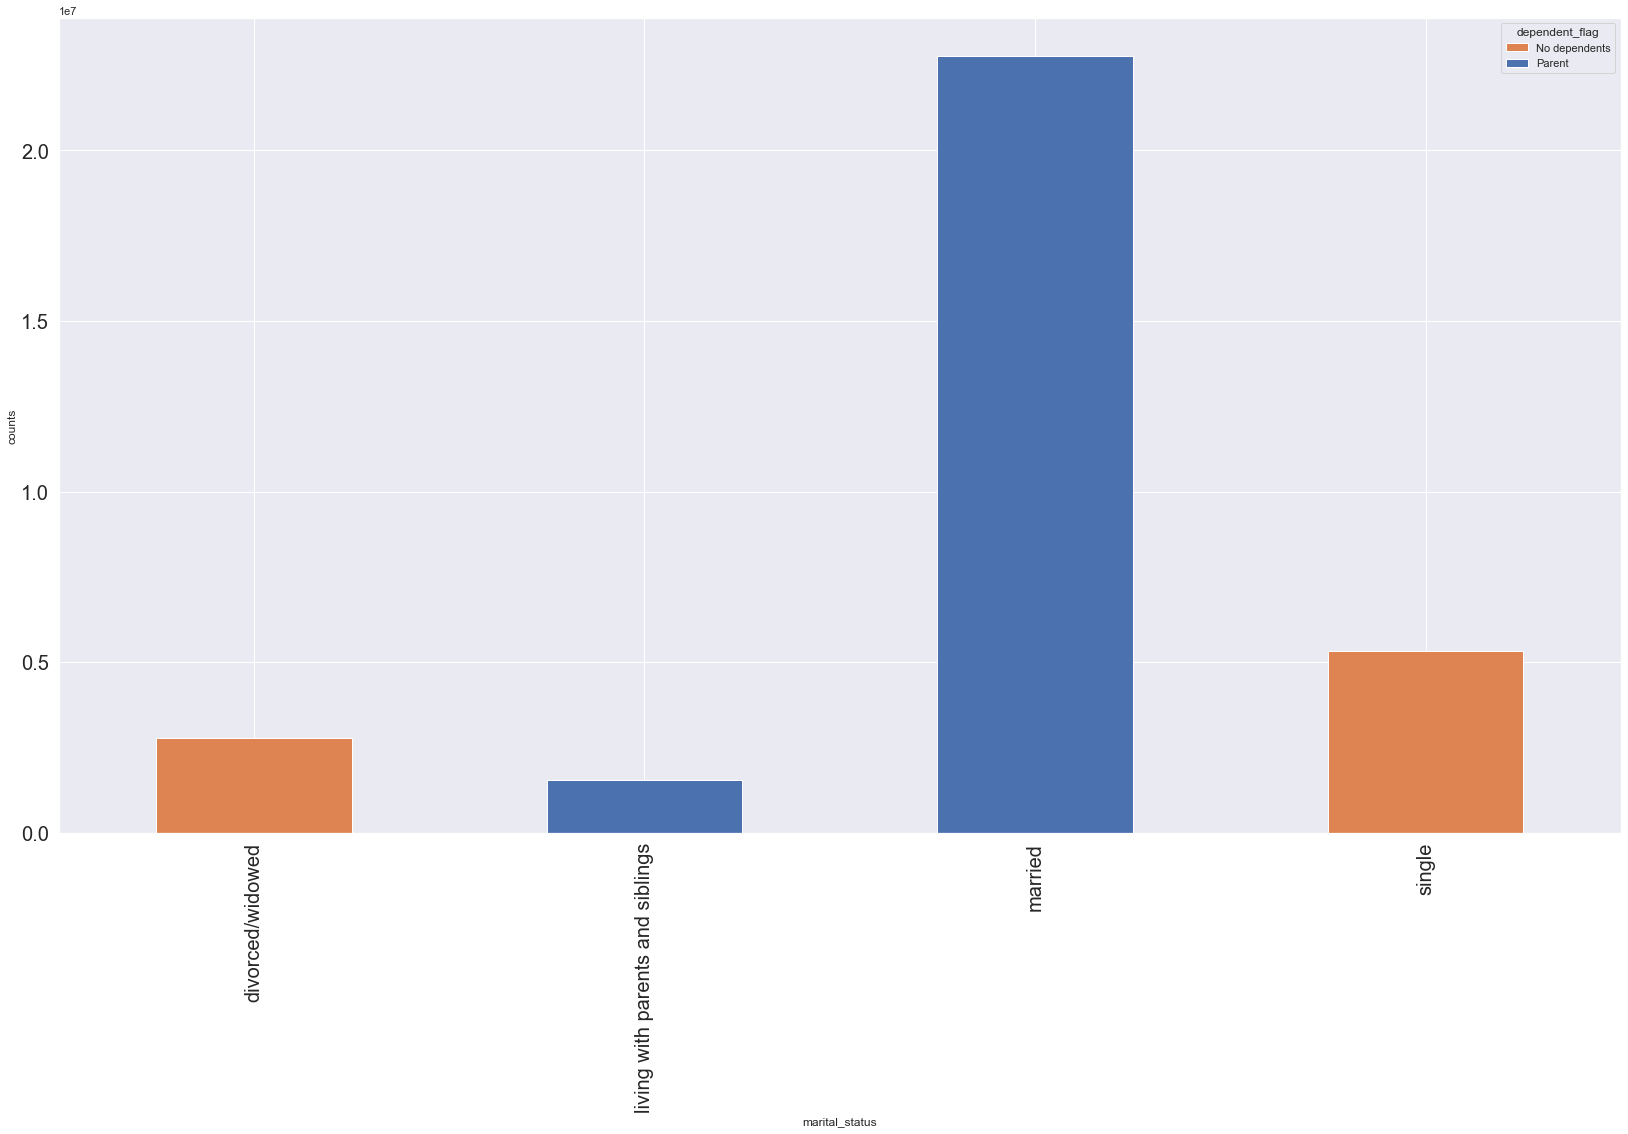

In [180]:
#stacked bar chart for marital status and dependent flag
marital_dependent_bar=df.groupby('marital_status')['dependent_flag'].value_counts().unstack().plot.bar(stacked=True,
                                                         ylabel='counts',color=['#de8452','#4b72af'], fontsize=20)

In [131]:
# 100% stacked bar chart for marital order frequency distribution 
#creating crosstab for order frequency and income

marital_frequency = pd.crosstab(index=df['marital_status'], columns=df['order_frequency'], normalize="index")

#creating cross tab to display labels
marital_frequency_labels = pd.crosstab(index=df['marital_status'],columns=df['order_frequency'])

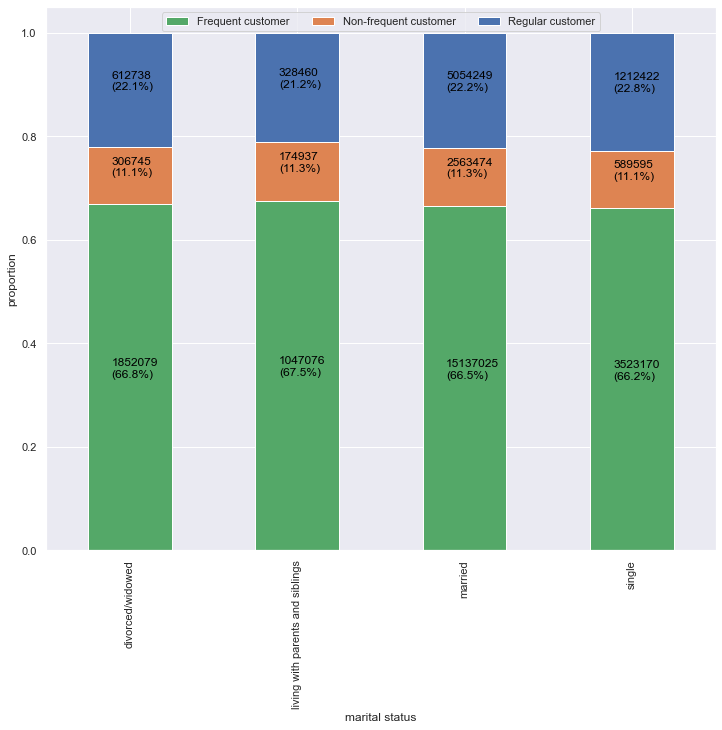

In [132]:
#plotting chart
marital_frequency_dist=marital_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['#54a868','#de8452','#4b72af'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("marital status")


for n, y in enumerate([*marital_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(marital_frequency.loc[y],
                                         marital_frequency_labels.loc[y],
                                          marital_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

### Dependent flag distributions

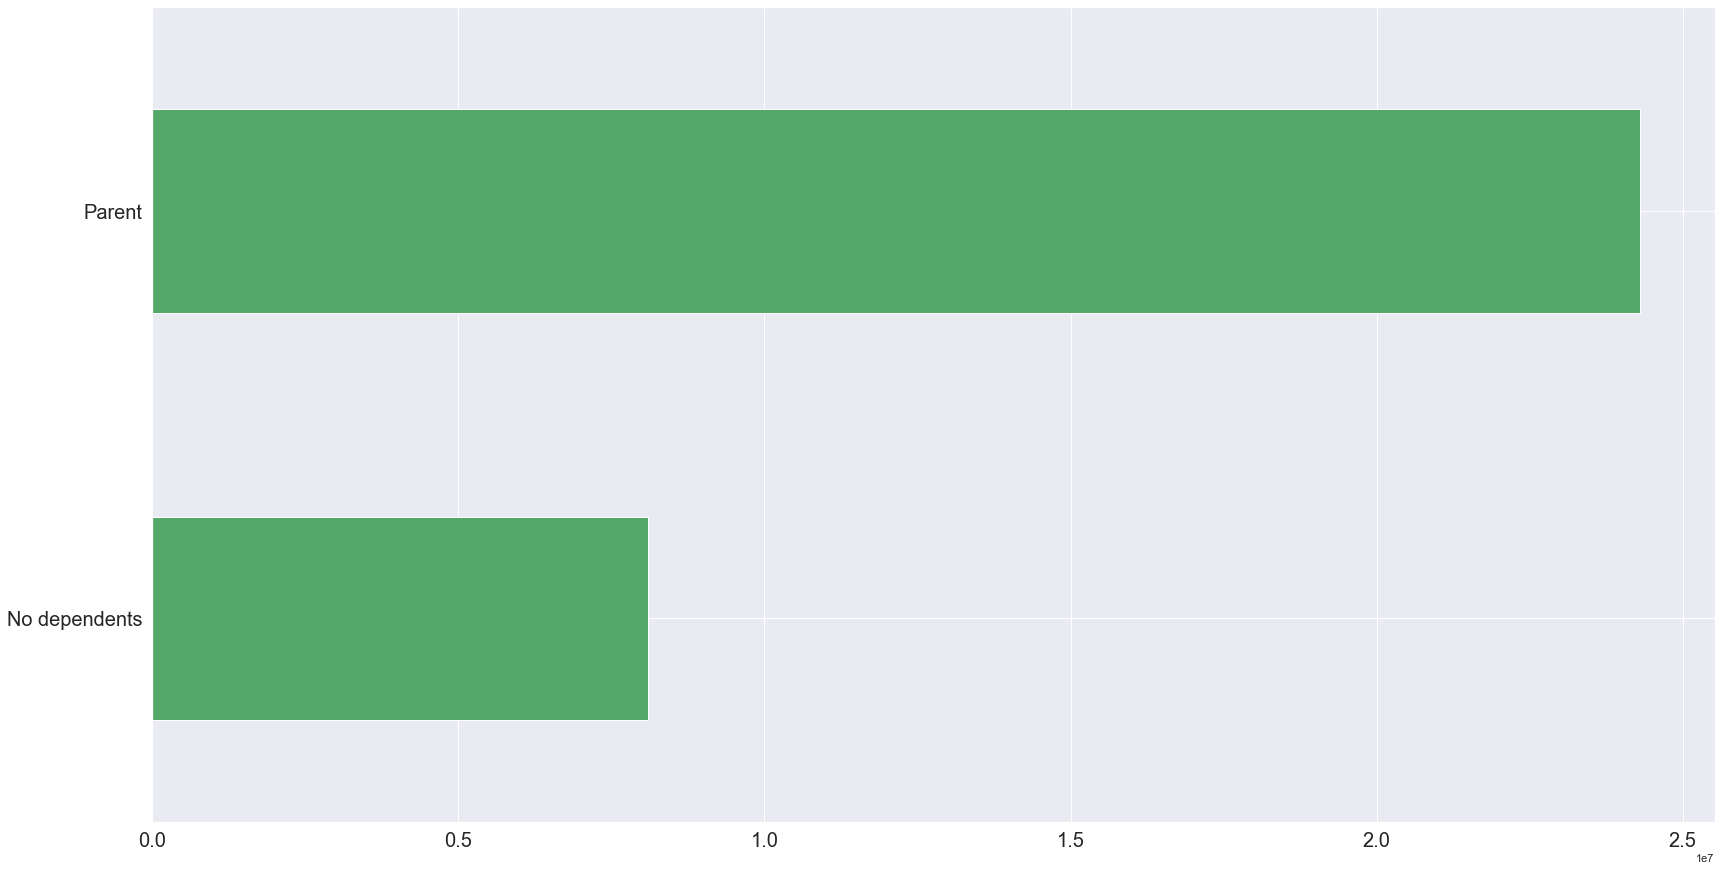

In [169]:
#bar chart showing the amount of orders made by customers in each dependent flag
dependent_bar=df['dependent_flag'].value_counts().sort_values().plot.barh(color='#54a868', fontsize=20)

In [170]:
# 100% stacked bar chart for regional dependent flag distribution
#creating crosstab for region and dependent flag

dependent_region = pd.crosstab(index=df['region'], columns=df['dependent_flag'], normalize="index")

#creating cross tab to display labels

dependent_region_labels = pd.crosstab(index=df['region'],columns=df['dependent_flag'])

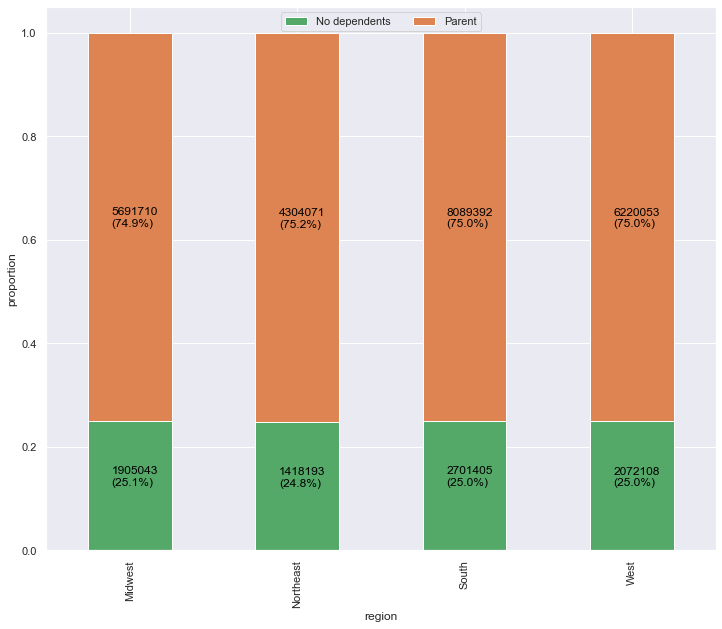

In [171]:
#plotting chart
dependent_regional_dist=dependent_region.plot(kind='bar', 
                        stacked=True, 
                        color=['#54a868','#de8452'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("region")


for n, y in enumerate([*dependent_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(dependent_region.loc[y],
                                         dependent_region_labels.loc[y],
                                          dependent_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [172]:
# 100% stacked bar chart for dependent order frequency distribution 
#creating crosstab for order frequency and dependent flag

dependent_frequency = pd.crosstab(index=df['dependent_flag'], columns=df['order_frequency'], normalize="index")

#creating cross tab to display labels
dependent_frequency_labels = pd.crosstab(index=df['dependent_flag'],columns=df['order_frequency'])

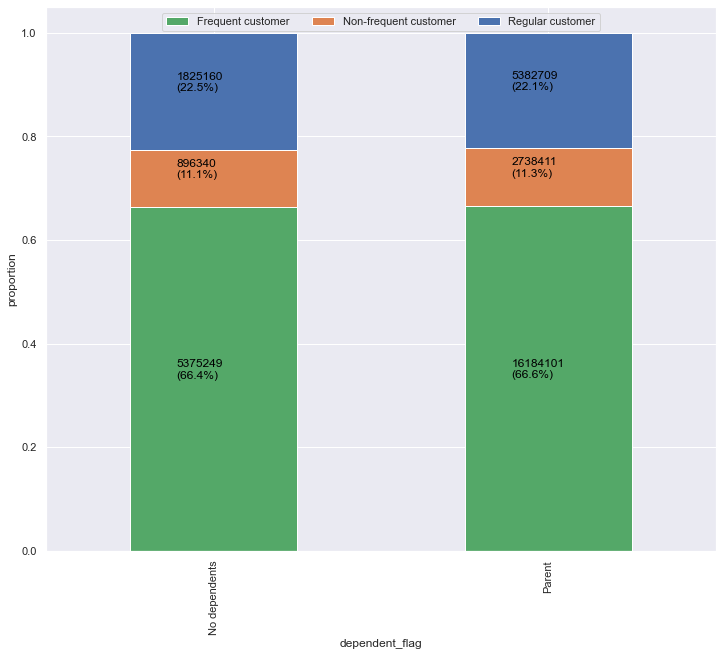

In [173]:
#plotting chart
dependent_frequency_dist=dependent_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['#54a868','#de8452','#4b72af'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("dependent_flag")


for n, y in enumerate([*dependent_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(dependent_frequency.loc[y],
                                         dependent_frequency_labels.loc[y],
                                          dependent_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

### Pet parent distribution

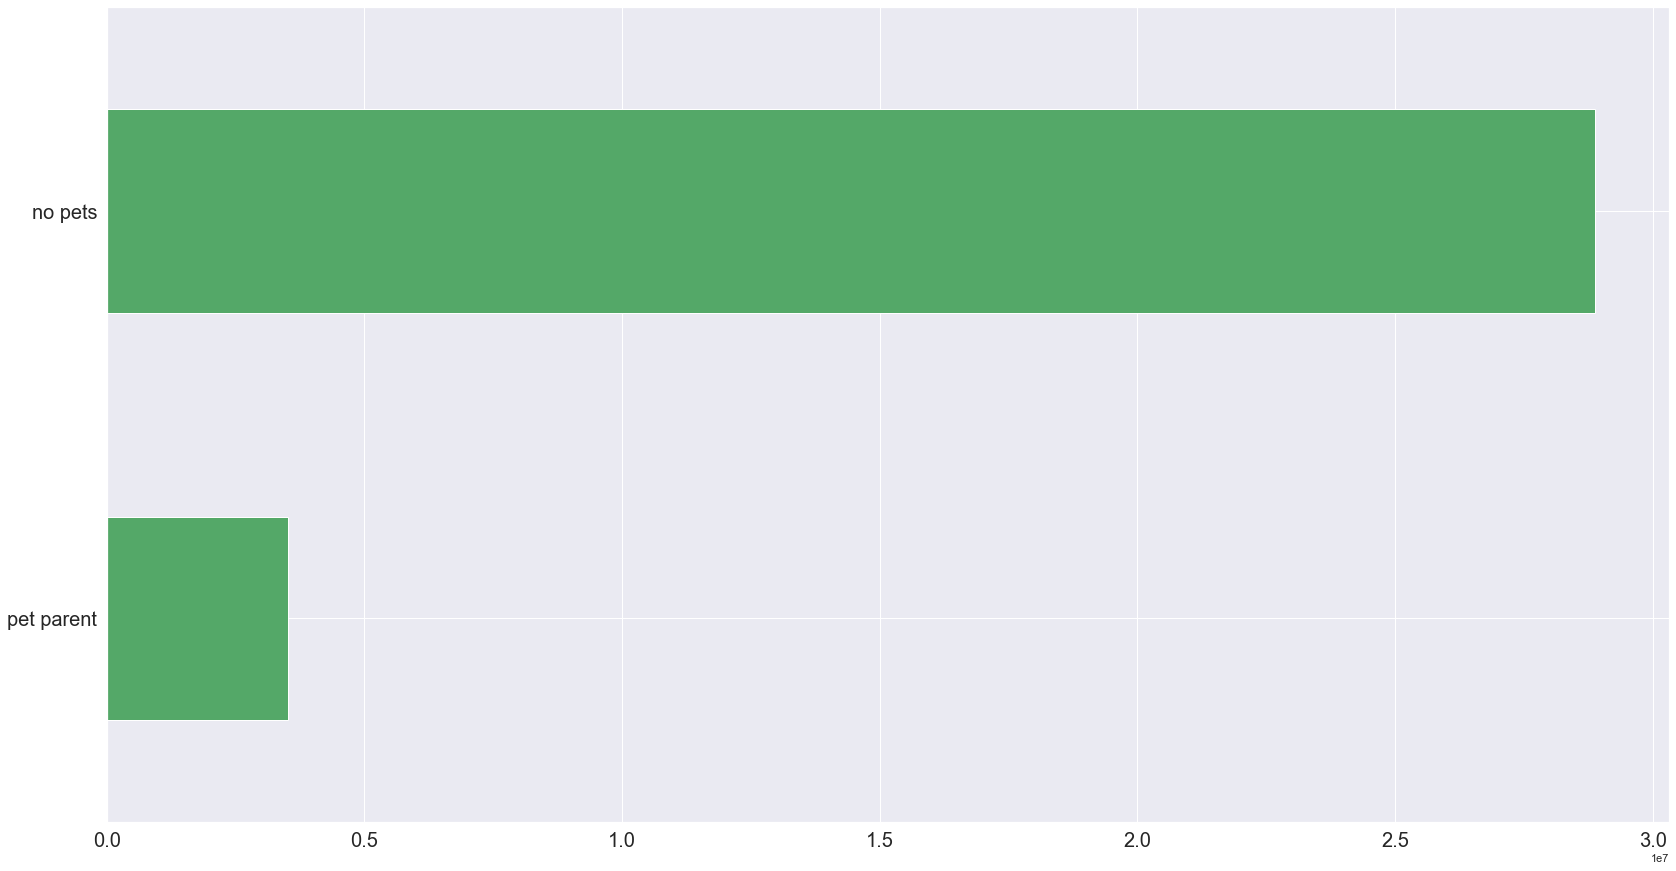

In [111]:
#bar chart showing the amount of orders made by pet parents and customers with no pets
pet_bar=df['pet_parents'].value_counts().sort_values().plot.barh(color='#54a868', fontsize=20)

In [135]:
#pet parent regional distribution
# 100% stacked bar chart for regional pet parent distribution 
#creating crosstab for region and pet parent flag

pet_region = pd.crosstab(index=df['region'], columns=df['pet_parents'], normalize="index")

#creating cross tab to display labels

pet_region_labels = pd.crosstab(index=df['region'],columns=df['pet_parents'])


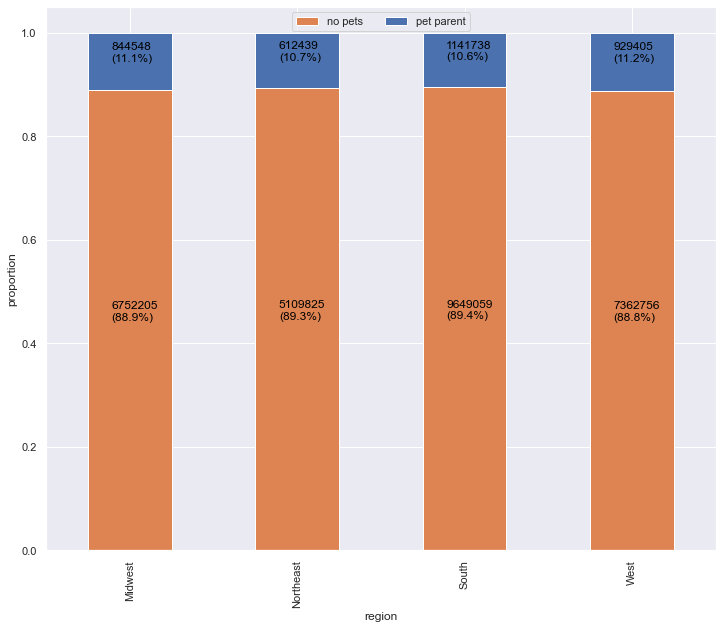

In [137]:
#plotting chart
pet_regional_dist=pet_region.plot(kind='bar', 
                        stacked=True, 
                        color=['#de8452','#4b72af','#54a868'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("region")


for n, y in enumerate([*pet_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(pet_region.loc[y],
                                         pet_region_labels.loc[y],
                                          pet_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [153]:
# 100% stacked bar chart for pet parent flag and order frequency distribution 
#creating crosstab for order frequency and pet parent flag

pet_frequency = pd.crosstab(index=df['pet_parents'], columns=df['order_frequency'], normalize="index")

#creating cross tab to display labels

pet_frequency_labels = pd.crosstab(index=df['pet_parents'],columns=df['order_frequency'])

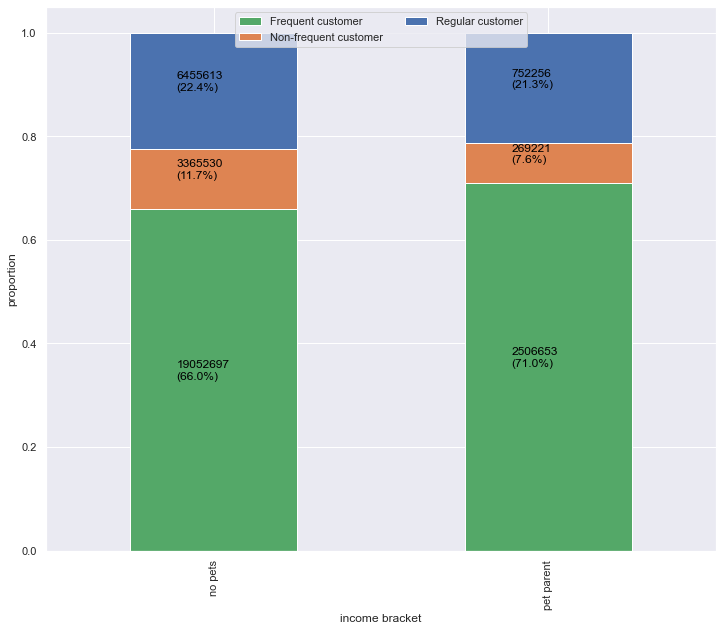

In [154]:
#plotting chart
pet_frequency_dist=pet_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['#54a868','#de8452','#4b72af'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=2)
plt.ylabel("proportion")
plt.xlabel("income bracket")


for n, y in enumerate([*pet_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(pet_frequency.loc[y],
                                         pet_frequency_labels.loc[y],
                                          pet_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

## 10 Department visualizations

In [138]:
#defining function to show labels on charts
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

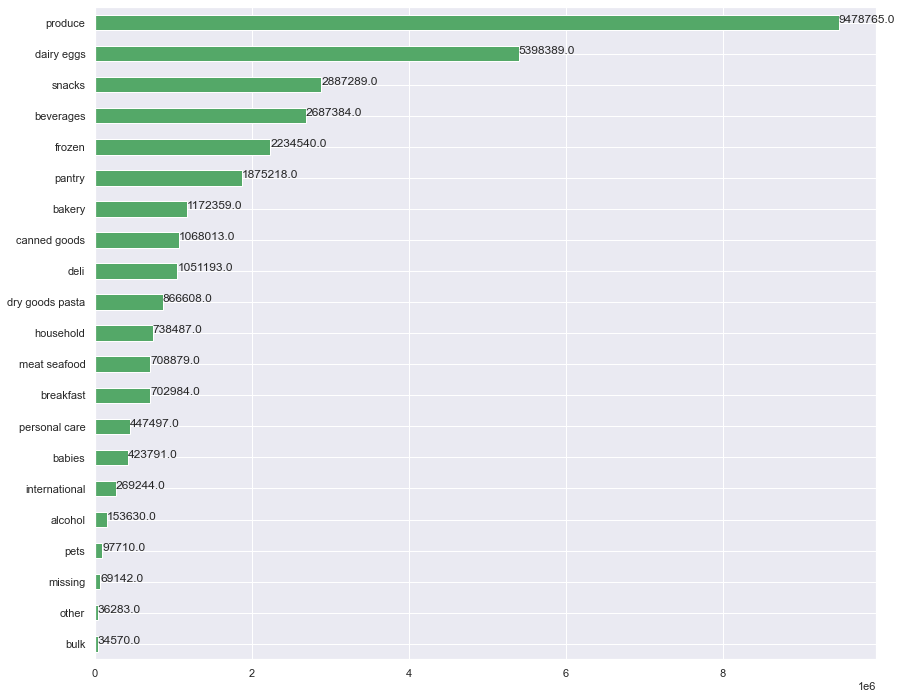

In [139]:
# bar chart showing the orders made for each department
department_bar=df.department.value_counts().sort_values().plot(kind = 'barh',color=['#54a868'],figsize=[14,12])
show_values(department_bar, "h", space=0)

### Regional

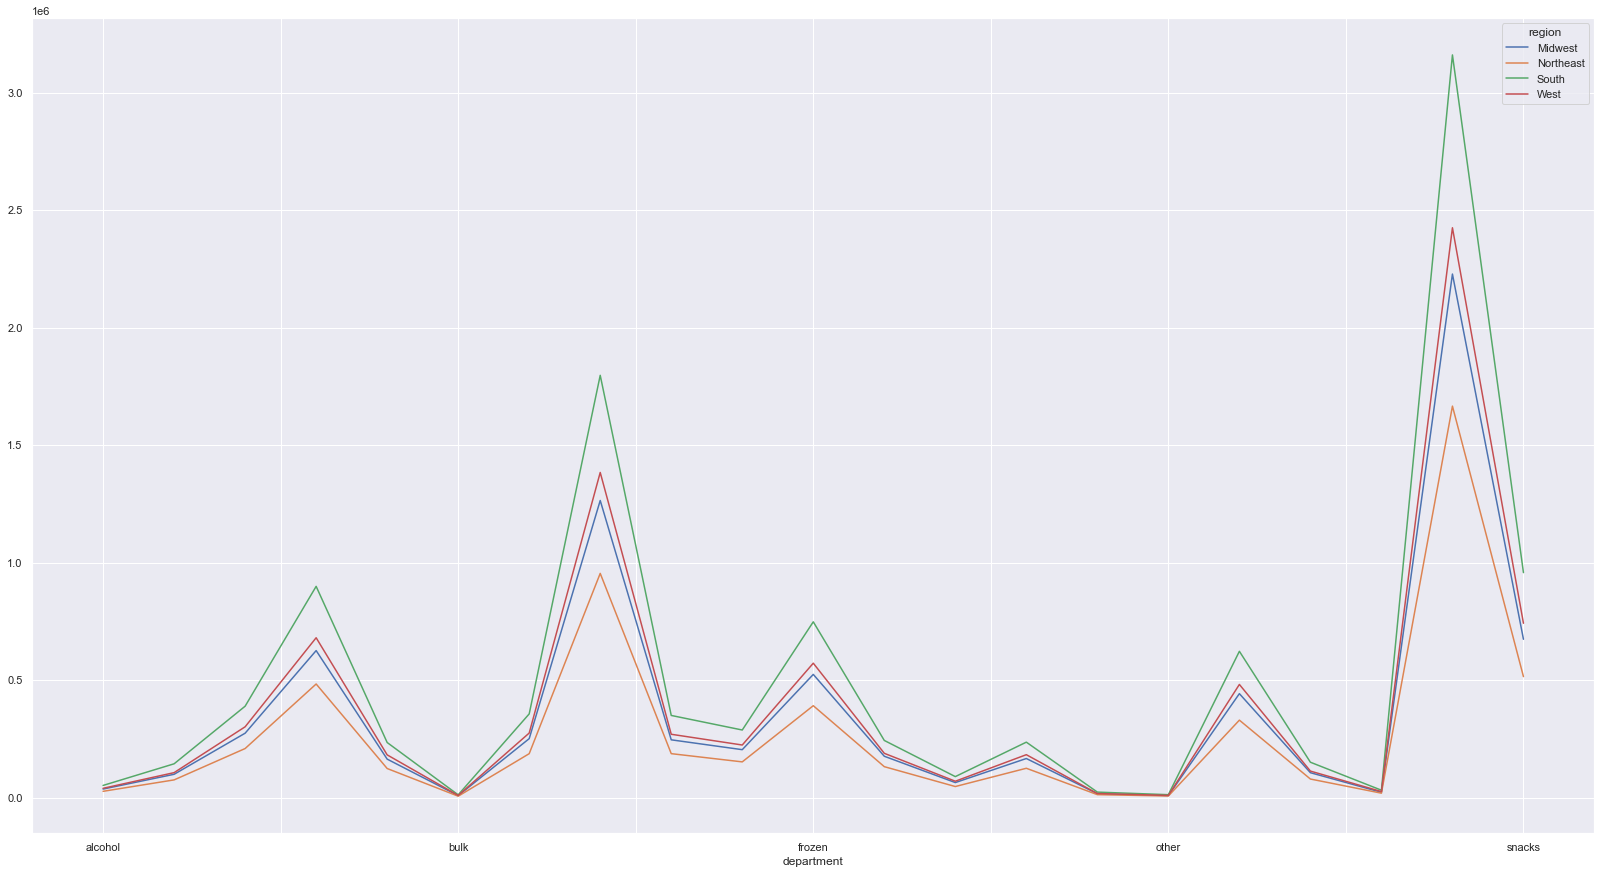

In [289]:
#line chart for products purchased in each department for region
#plotted using crosstab
dep_region_cross=pd.crosstab(df['department'],df['region'], dropna=False).plot(kind='line')

### Price range distribution

In [149]:
#price range value counts
df['price_range_loc'].value_counts()

Mid-range product     21859037
Low-range product     10125288
High-range product      412524
Name: price_range_loc, dtype: int64

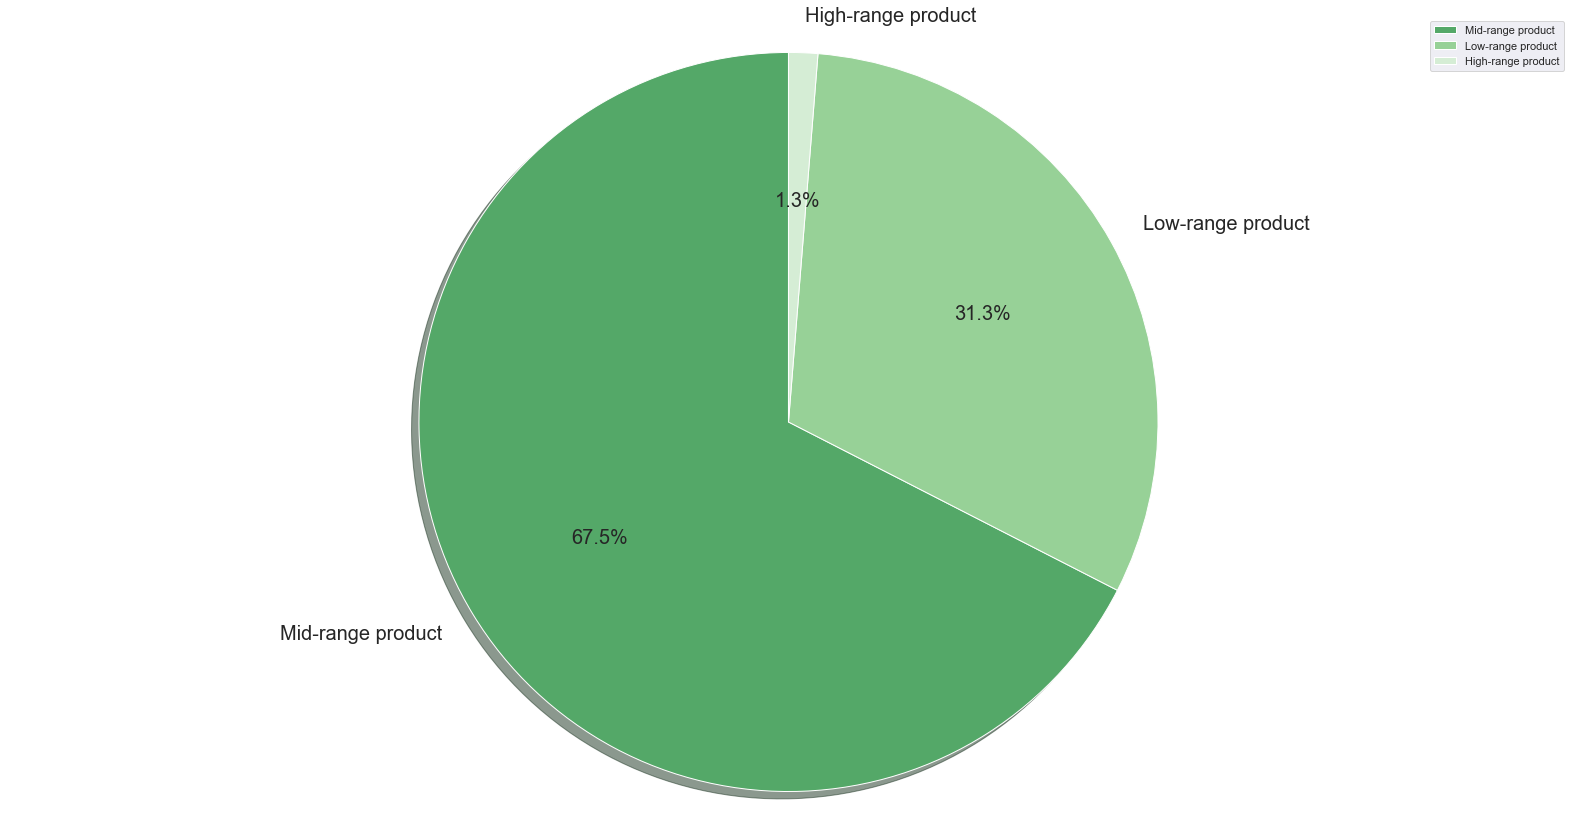

In [150]:
#pie chart for price range distribution
labels = 'Mid-range product', 'Low-range product', 'High-range product'
sizes = df['price_range_loc'].value_counts()
colors = ['#54a868','#97d197','#d5edd5']
textprops = {"fontsize":20}

fig, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops=textprops)
ax.axis('equal')  

plt.legend()
plt.show()


### Customer loyalty

In [81]:
#table showing the proportion of products bought in each department for each customer loyalty
loyalty_cross=pd.crosstab(df['loyalty_flag'], df['department'], normalize='index', dropna = False)
loyalty_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
loyalty_flag,,,,,,,,,,,,,,,,,,,,,
Loyal Customer,0.003765,0.016249,0.036938,0.083140,0.021546,0.001345,0.028646,0.178013,0.031509,0.023588,0.059262,0.019143,0.007623,0.019689,0.001784,0.001042,0.054492,0.011996,0.002477,0.306043,0.091710
New customer,0.006030,0.009631,0.035833,0.082058,0.022162,0.000844,0.037835,0.155624,0.032958,0.030332,0.077723,0.026718,0.009148,0.023483,0.002738,0.001236,0.062824,0.015804,0.003289,0.278171,0.085560
Regular customer,0.004867,0.012381,0.035829,0.083155,0.021610,0.000974,0.033841,0.163536,0.032844,0.027381,0.071803,0.023611,0.008425,0.022664,0.002123,0.001125,0.058118,0.014203,0.003257,0.289435,0.088818


In [336]:
loyalty_cross.to_clipboard()

### Age groups

In [83]:
#table showing the proportion of products bought in each department for each age group
age_cross=pd.crosstab(df['age_group'], df['department'], normalize='index', dropna = False)
age_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
Adult,0.004743,0.013180,0.036216,0.082984,0.021734,0.001059,0.032966,0.166640,0.032508,0.026711,0.068851,0.022731,0.008314,0.021716,0.002126,0.001124,0.057831,0.013879,0.002938,0.292374,0.089376
Senior,0.004550,0.012764,0.036097,0.083344,0.021440,0.001078,0.032939,0.166324,0.032376,0.026699,0.069233,0.022961,0.008254,0.022172,0.002110,0.001099,0.057957,0.013690,0.003066,0.293159,0.088689
Young adult,0.005192,0.013264,0.036192,0.081712,0.022093,0.001084,0.032986,0.167096,0.032229,0.027052,0.068953,0.022726,0.008417,0.022089,0.002236,0.001148,0.057913,0.013716,0.003338,0.291968,0.088597


### Income groups

In [84]:
#table showing the proportion of products bought in each department for each income group
income_cross=pd.crosstab(df['income_flag'], df['department'], normalize='index', dropna = False)
income_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_flag,,,,,,,,,,,,,,,,,,,,,
Low income,0.005431,0.009020,0.032075,0.111242,0.026820,0.001344,0.024484,0.149460,0.031665,0.020033,0.065064,0.025900,0.006547,0.010698,0.002019,0.001154,0.050196,0.014312,0.002608,0.248096,0.161832
Middle income,0.004415,0.013660,0.036505,0.078865,0.020975,0.001048,0.034063,0.168920,0.032550,0.027646,0.069263,0.022140,0.008555,0.023360,0.002152,0.001110,0.058794,0.013722,0.003028,0.299873,0.079354
Upper income,0.006660,0.013381,0.038778,0.081041,0.021210,0.000864,0.034556,0.169097,0.032526,0.027765,0.071488,0.024352,0.008495,0.023726,0.002127,0.001159,0.059984,0.013920,0.003441,0.287366,0.078063


### Marital status

In [85]:
#table showing the proportion of products bought in each department for each marital status
marital_cross=pd.crosstab(df['marital_status'], df['department'], normalize='index', dropna = False)
marital_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
marital_status,,,,,,,,,,,,,,,,,,,,,
divorced/widowed,0.004548,0.012746,0.036223,0.083332,0.021466,0.000997,0.032205,0.166648,0.032766,0.026778,0.069838,0.022295,0.008320,0.021821,0.001982,0.001082,0.057714,0.013903,0.003034,0.293264,0.089038
living with parents and siblings,0.005736,0.012993,0.036208,0.080361,0.022400,0.001080,0.033016,0.168189,0.032513,0.026895,0.069992,0.022712,0.008432,0.021916,0.002303,0.001233,0.058217,0.013744,0.003625,0.289975,0.088459
married,0.004643,0.013059,0.036117,0.082995,0.021696,0.001082,0.033048,0.166487,0.032329,0.026792,0.068949,0.022964,0.008282,0.022010,0.002131,0.001107,0.057933,0.013808,0.002967,0.292415,0.089186
single,0.004974,0.013364,0.036430,0.083243,0.021609,0.001035,0.032969,0.166638,0.032736,0.026485,0.068269,0.022336,0.008385,0.021331,0.002177,0.001159,0.057603,0.013793,0.003037,0.293424,0.089002


In [87]:
marital_cross.to_clipboard()

### Dependent flag

In [176]:
#table showing the proportion of products bought in each department for each dependent flag
dependent_cross=pd.crosstab(df['dependent_flag'], df['department'], normalize='index', dropna = False)
dependent_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
dependent_flag,,,,,,,,,,,,,,,,,,,,,
No dependents,0.004828,0.013152,0.036359,0.083274,0.021560,0.001022,0.032707,0.166641,0.032746,0.026586,0.068806,0.022322,0.008363,0.021499,0.002110,0.001133,0.057641,0.013831,0.003036,0.293369,0.089015
Parent,0.004713,0.013055,0.036123,0.082827,0.021741,0.001082,0.033046,0.166595,0.032341,0.026799,0.069016,0.022948,0.008292,0.022004,0.002142,0.001115,0.057951,0.013804,0.003009,0.292259,0.089140


In [179]:
dependent_cross.to_clipboard()

### Pet parents

In [158]:
#table showing the proportion of products bought in each department for pet parents
pet_cross=pd.crosstab(df['pet_parents'], df['department'], normalize='index', dropna = False)
pet_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
pet_parents,,,,,,,,,,,,,,,,,,,,,
no pets,0.004377,0.013421,0.035729,0.081780,0.021717,0.001123,0.032515,0.168445,0.032535,0.026456,0.067467,0.020805,0.008229,0.021732,0.002131,0.001072,0.057295,0.012807,0.000000,0.301143,0.089221
pet parent,0.007723,0.010282,0.039891,0.092426,0.021523,0.000606,0.036612,0.151564,0.031683,0.029118,0.081210,0.039044,0.008967,0.023070,0.002160,0.001508,0.062607,0.022023,0.027695,0.222100,0.088190


In [159]:
pet_cross.to_clipboard()

## 11 Exporting visualizations and final dataset

In [202]:
#exporting price range pie chart
fig.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_pie.png'))

In [286]:
#exporting department bar chart
department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_bar.png'))

In [151]:
#exporting pet parents distribution charts
pet_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pet_bar.png'))
pet_regional_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pet_regional_dist.png'))

In [157]:
#exporting pet frequency dist
pet_frequency_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pet_frequency.png'))

In [177]:
#exporting dependent charts
dependent_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependent_bar.png'))
dependent_regional_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependent_regional.png'))
dependent_frequency_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependent_frequency.png'))
dependent_spending_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependent_spending.png'))

In [ ]:
#exporting visualizations for region
#exporting regional distribution bar
regional_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_bar.png'))
#exporting regional frequency distribution stacked bar
region_frequency_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_frequency.png'))
#exporting dep region cross
dep_region_cross.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','dep_region_cross.png'))

In [ ]:
#exporting visualizations for customer loyalty
#exporting loyalty flag distribution pie chart
loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_dist.png'))
#exporting loyalty bar
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_bar.png'))
#exporting loyalty spending stacked bar
loyalty_spend_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_spend.png'))
#exporting loyalty frequency stacked bar
loyalty_frequency_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_frequency.png'))
#exporting loyalty department crosstab bar
loyalty_cross.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_dep.png'))

In [ ]:
#exporting visualizations for age group
#exporting age group distribution charts
age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_bar.png'))
age_regional_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_regional_dist.png'))
#exporting age marital bar
age_marital_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_marital_bar.png'))
#exporting age income bar
age_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_bar.png'))

In [ ]:
#exporting visualizations for income group
#exporting income distribution charts
income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_bar.png'))
income_regional_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_regional_dist.png'))
#exporting income cross bar
income_cross_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','income_cross_bar.png'))

In [ ]:
#exporting visualizations for marital status
#exporting marital distribution charts
marital_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_bar.png'))
marital_regional_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_regional_dist.png'))
#exporting marital dependent bar
marital_dependent_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_dependent_bar.png'))

In [297]:
#exporting final dataset
df.to_pickle(os.path.join(path, '02 Data','Prepared', 'final_dataset.pkl'))